<a href="https://colab.research.google.com/github/C3578/Segmentation_graph_images/blob/master/Graph_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import random
import os
from tqdm import tqdm

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
data_root = 
list_ = os.listdir(data_root)

In [ ]:
def print_(img):
  img_1 = cv2.imread(data_root + img)
  gray_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
  a = np.where((gray_1 > 222) & (gray_1 < 240), gray_1, gray_1*0)
  cv2_imshow(a)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [ ]:
img_1 = cv2.imread(data_root + '35.bmp')

In [ ]:
img_1.shape

(472, 1417, 3)

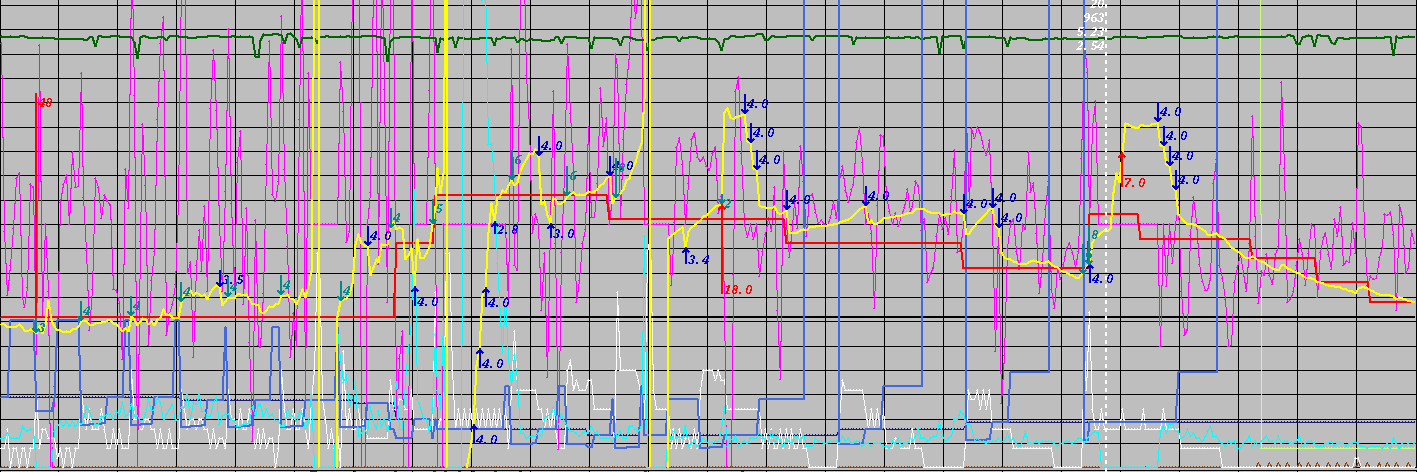

In [ ]:
cv2_imshow(img_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
gray_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

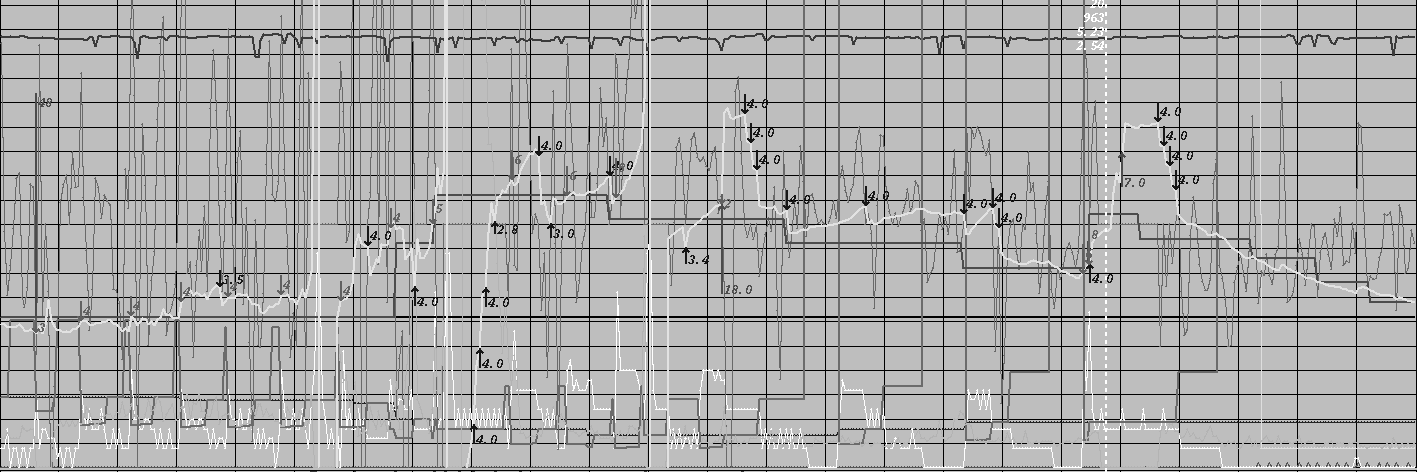

In [ ]:
cv2_imshow(gray_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

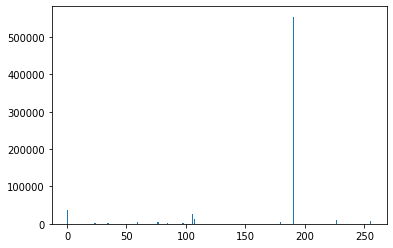

In [ ]:
plt.hist(gray_1.ravel(),256,[0,256])
plt.show()

In [ ]:
a = np.where(gray_1 > 190, gray_1, gray_1*0)

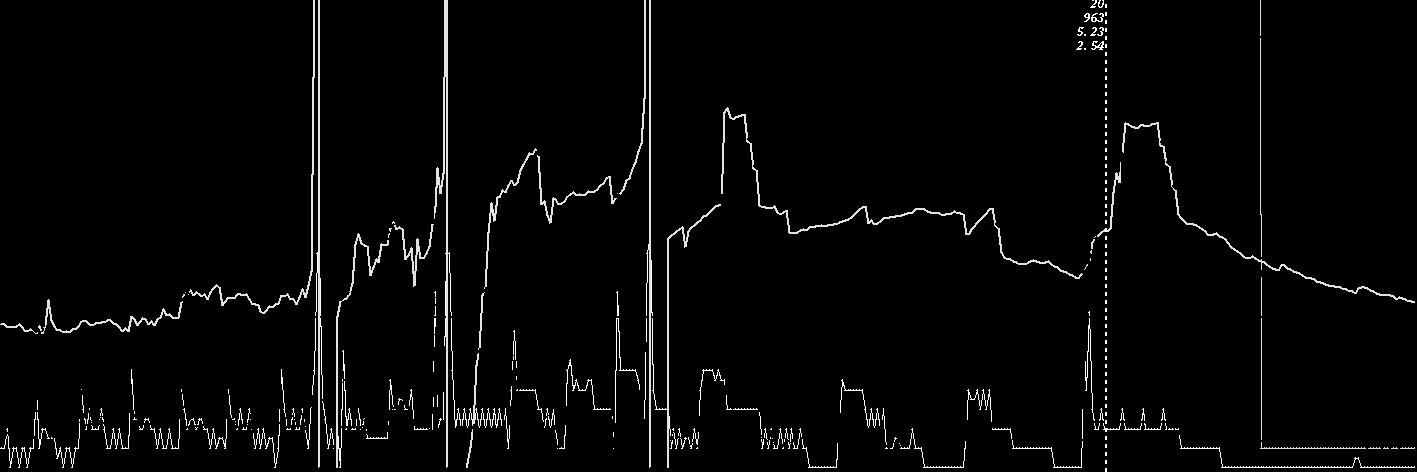

In [ ]:
cv2_imshow(a)
cv2.waitKey(0)
cv2.destroyAllWindows()

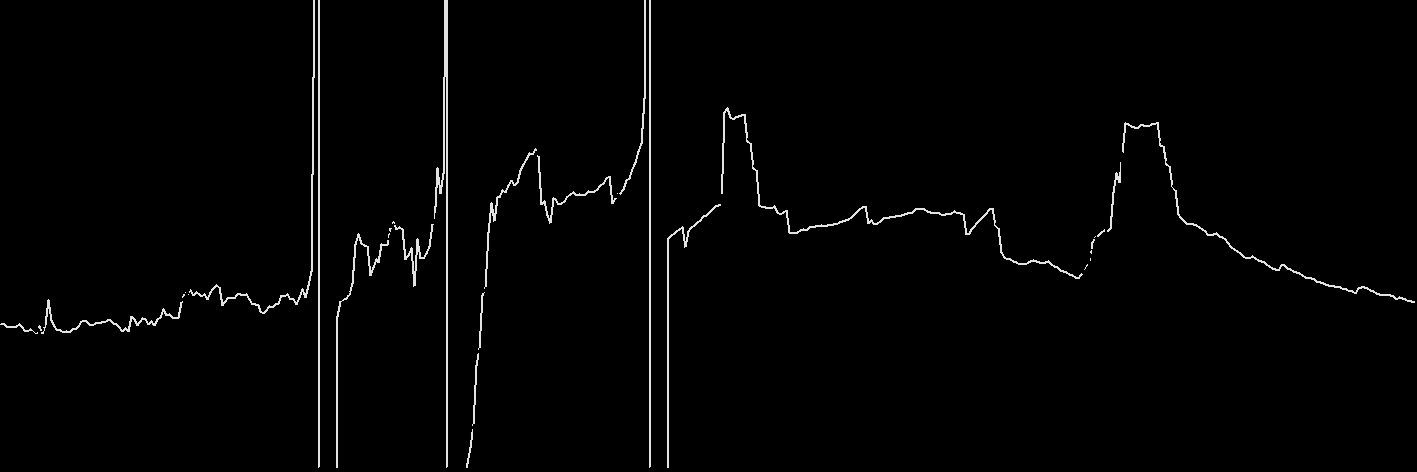

In [ ]:
a = np.where((gray_1 > 222) & (gray_1 < 240), gray_1, gray_1*0)
cv2_imshow(a)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Находит левые и правые границы выделяемых областей.
def func_3(img):
  img_1 = cv2.imread(data_root + img)
  gray_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
  b, c = gray_1.shape

  a = np.where((gray_1 > 222) & (gray_1 < 240), gray_1 , gray_1*0)
  up = np.where(a[10][:] > 0)[0]
  down = np.where(a[b-10][:] > 0)[0]

  if len(up) % 4 == 0:
    up_1 = []
    for i in range(len(up)//4):
      up_1 += [[list(up[i*4 : i*4 + 4])[0], list(up[i*4 : i*4 + 4])[-1]]]

  if len(down) % 4 == 0:
    down_1 = []
    for i in range(len(down)//4):

      down_1 += [[list(down[i*4 : i*4 + 4])[0], list(down[i*4 : i*4 + 4])[-1]]]
  else:
    down_1 = []
    for i in range(len(down)//4):
      down_1 += [[list(down[i*4 : i*4 + 4])[0], list(down[i*4 : i*4 + 4])[-1]]]

  if len(up_1) != len(down_1):
    max_ = max(len(up_1), len(down_1))
    if len(up_1) != max_:
      for i in range(max_ - len(up_1)):
        up_1 += [down_1[len(up_1)  + i]]
    elif len(down_1) != max_:
      print('1')
      for i in range(max_ - len(down_1)):
        down_1 += [up_1[len(down_1) + i]]
  max_borders = []      
  for i in range(len(up_1)):
    max_borders += [[min(up_1[i][0], down_1[i][0]), max(up_1[i][1], down_1[i][1])]]

  return max_borders

In [ ]:
# Находит левые и правые границы выделяемых областей.
def func_4(img):
  
  b, c = img.shape

  a = np.where((img > 222) & (img < 240), img , img*0)
  up = np.where(a[10][:] > 0)[0]
  down = np.where(a[b-10][:] > 0)[0]
  
  if len(up) % 4 == 0:
    up_1 = []
    for i in range(len(up)//4):
      up_1 += [[list(up[i*4 : i*4 + 4])[0], list(up[i*4 : i*4 + 4])[-1]]]
  else:
    up_1 = []
    if len(up)/4 < 1:
      up_1 += [[up[0], up[-1]]]
    else:
      for i in range(len(up)//4):
        up_1 += [[list(up[i*4 : i*4 + 4])[0], list(up[i*4 : i*4 + 4])[-1]]]
  

  if len(down) % 4 == 0:
    down_1 = []
    for i in range(len(down)//4):

      down_1 += [[list(down[i*4 : i*4 + 4])[0], list(down[i*4 : i*4 + 4])[-1]]]
  else:
    down_1 = []
    for i in range(len(down)//4):
      down_1 += [[list(down[i*4 : i*4 + 4])[0], list(down[i*4 : i*4 + 4])[-1]]]

  if len(up_1) != len(down_1):
    max_ = max(len(up_1), len(down_1))
    if len(up_1) != max_:
      for i in range(max_ - len(up_1)):
        up_1 += [down_1[len(up_1)  + i]]
    elif len(down_1) != max_:
      print('1')
      for i in range(max_ - len(down_1)):
        down_1 += [up_1[len(down_1) + i]]
  max_borders = []      
  for i in range(len(up_1)):
    max_borders += [[min(up_1[i][0], down_1[i][0]), max(up_1[i][1], down_1[i][1])]]

  return max_borders

In [ ]:
def paint_borders_2(img):
  img_1 = cv2.imread(data_root + img)
  print(img_1.shape)
  gray_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

  a, b = gray_1.shape

  up_1, down_1 = func_4(gray_1)[0]
  print(func_4(gray_1))
  for i in func_4(gray_1):
    
    left_border, right_border = i
    if left_border < 24:
      img_1[ :4 , 0 : right_border + 19, :]=0
      img_1[a-4 : , 0 : right_border + 19, :]=0
      img_1[ : , right_border + 15 : right_border + 19, :]=0
    elif right_border + 19 > b:
      img_1[ : , left_border-24 : left_border-20, :]=0
      img_1[ :4 , left_border-24 : , :]=0
      img_1[a-4 : , left_border-24 : , :]=0

    else:
      img_1[ : , left_border-24 : left_border-20, :]=0
      img_1[ : , right_border + 15 : right_border + 19, :]=0
      img_1[ :4 , left_border-24 : right_border + 19, :]=0
      img_1[a-4 : , left_border-24 : right_border + 19, :]=0

  cv2_imshow(img_1)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

10.bmp
(467, 1417, 3)
[[1303, 1326]]


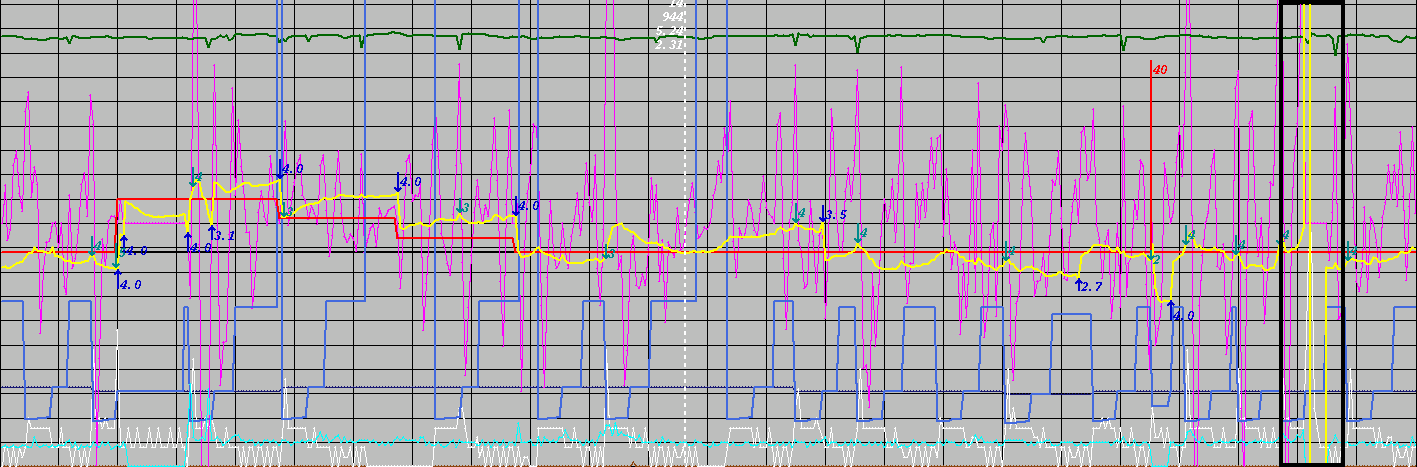

11.bmp
(467, 1416, 3)
[[226, 249], [789, 811], [811, 846]]


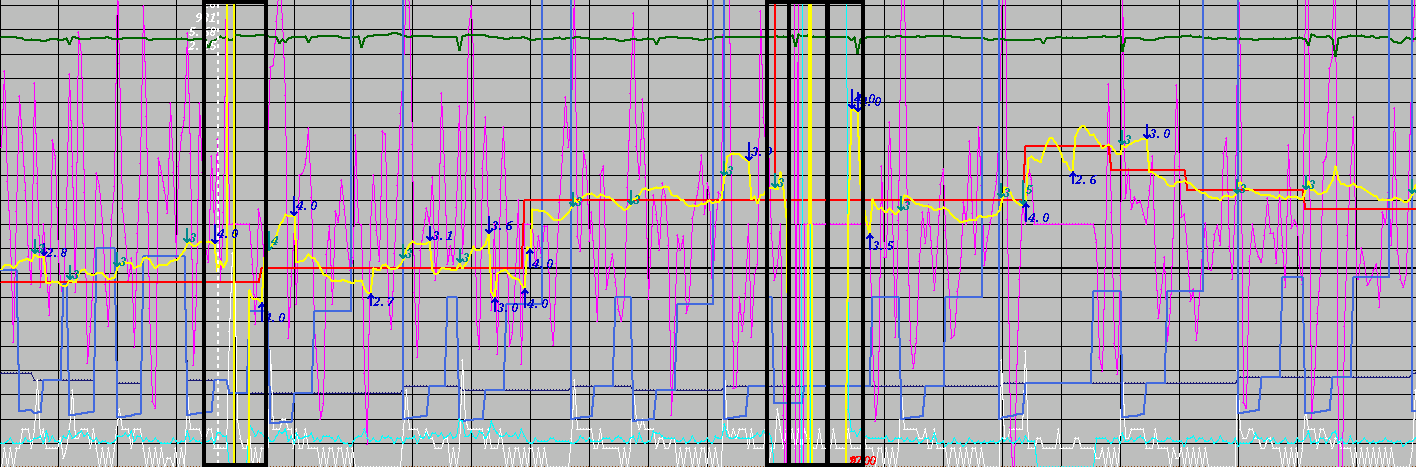

12.bmp
(467, 1417, 3)
[[220, 250]]


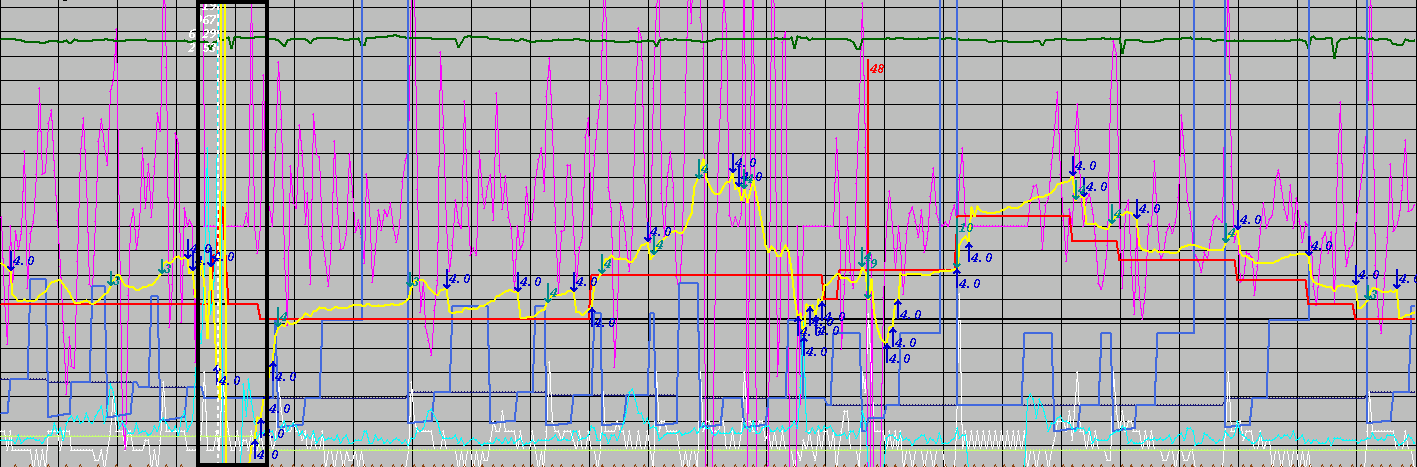

13.bmp
(466, 1415, 3)
[[1119, 1143]]


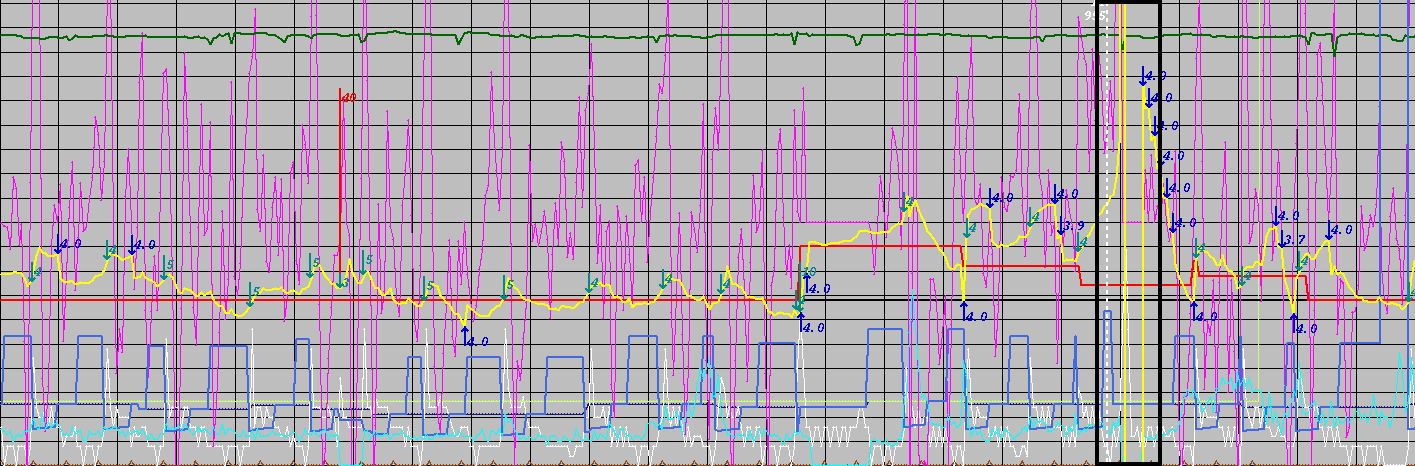

14.bmp
(469, 1415, 3)
[[1330, 1354]]


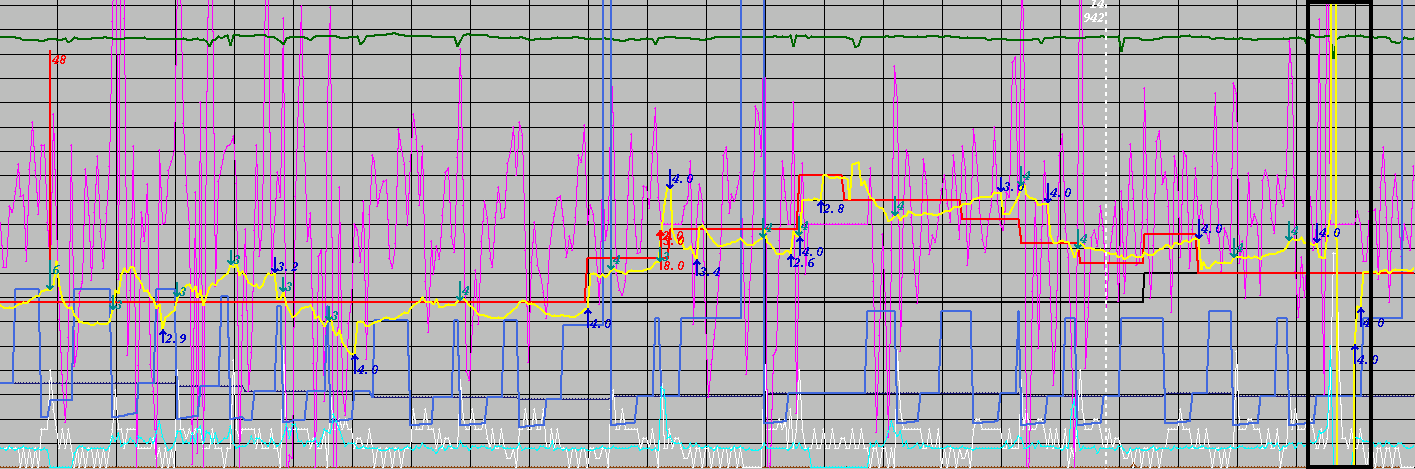

15.bmp
(470, 1417, 3)
[[791, 815]]


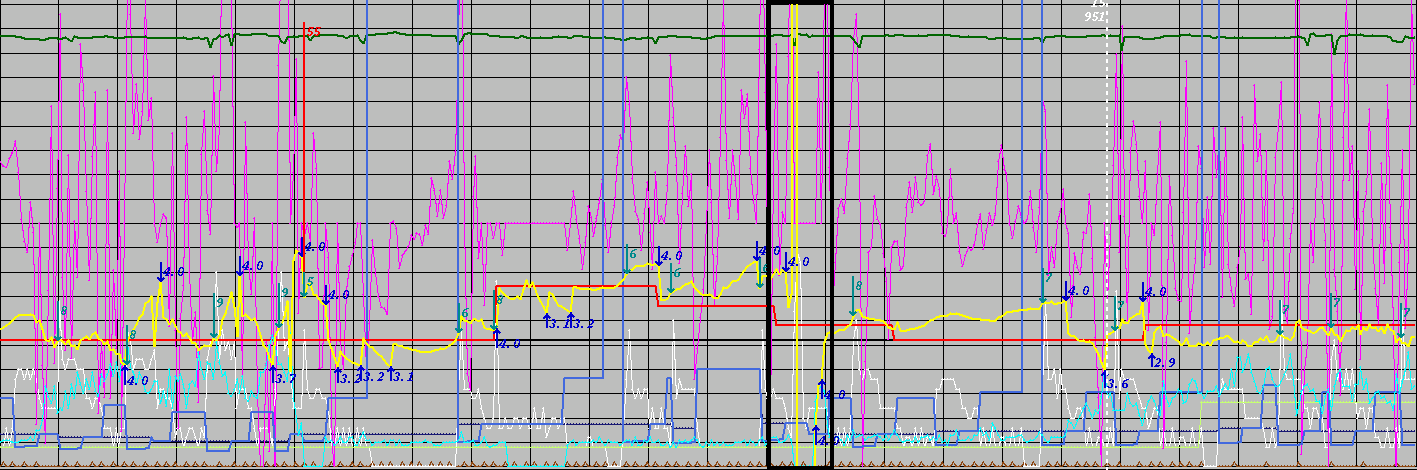

16.bmp
(468, 1417, 3)
[[455, 480], [1300, 1318]]


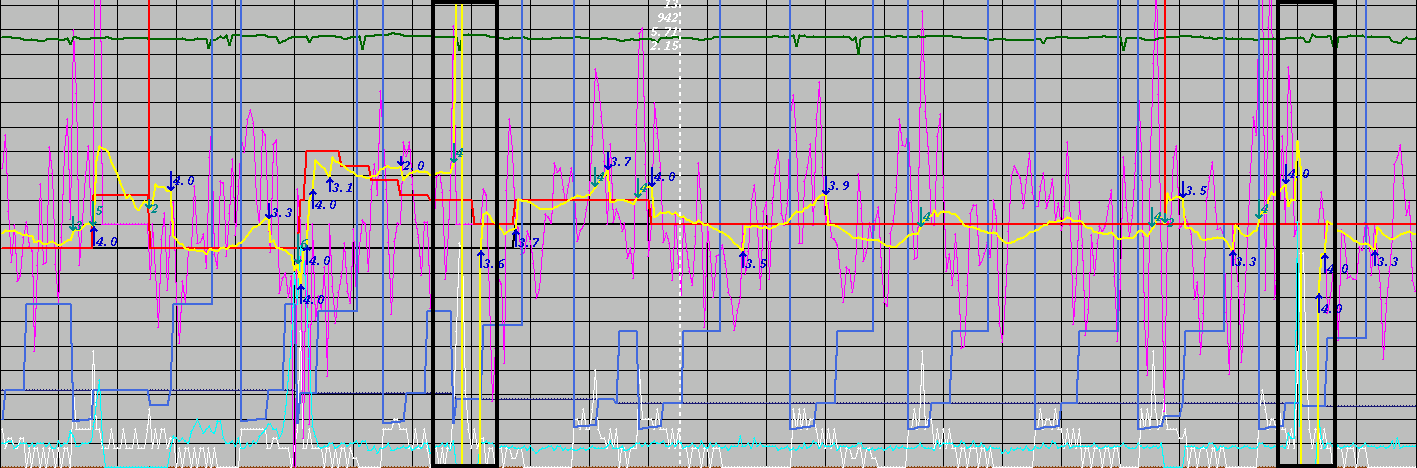

17.bmp
(469, 1416, 3)
[[67, 91]]


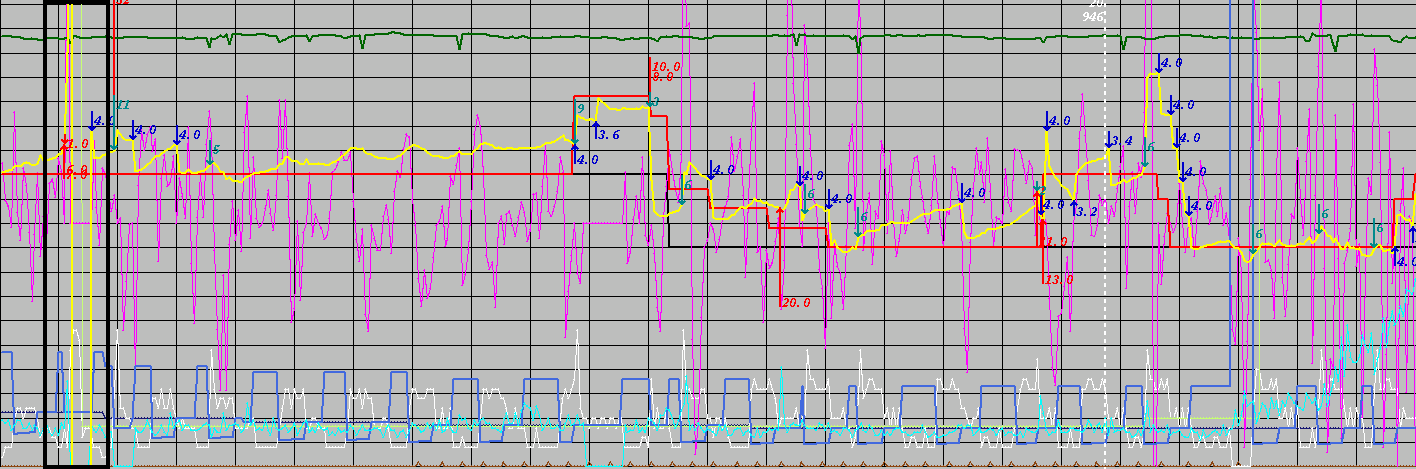

18.bmp
(466, 1416, 3)
[[356, 383]]


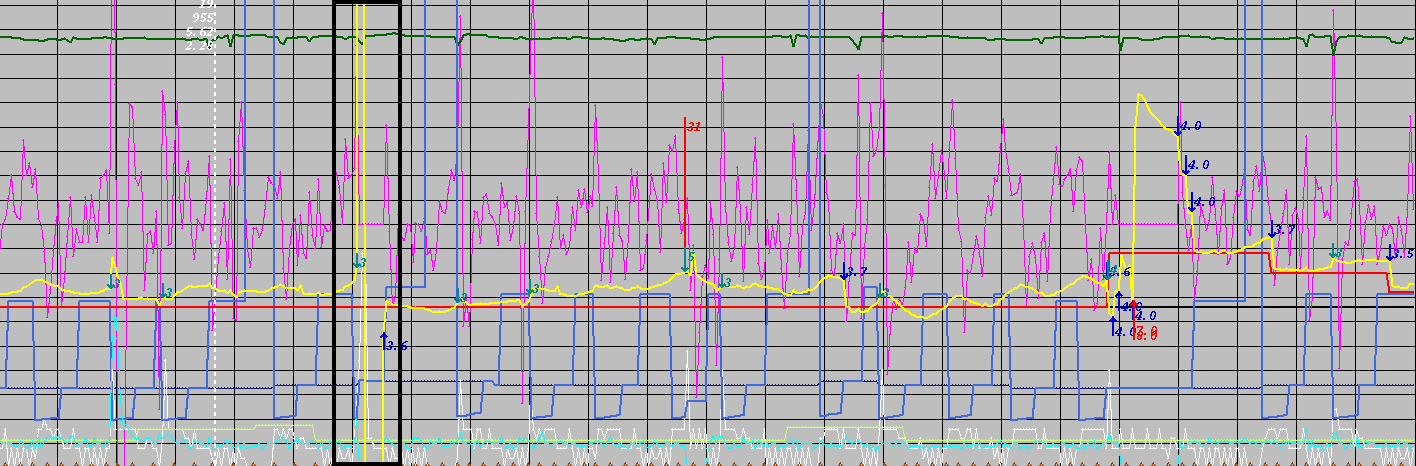

19.bmp
(470, 1418, 3)
[[452, 479]]


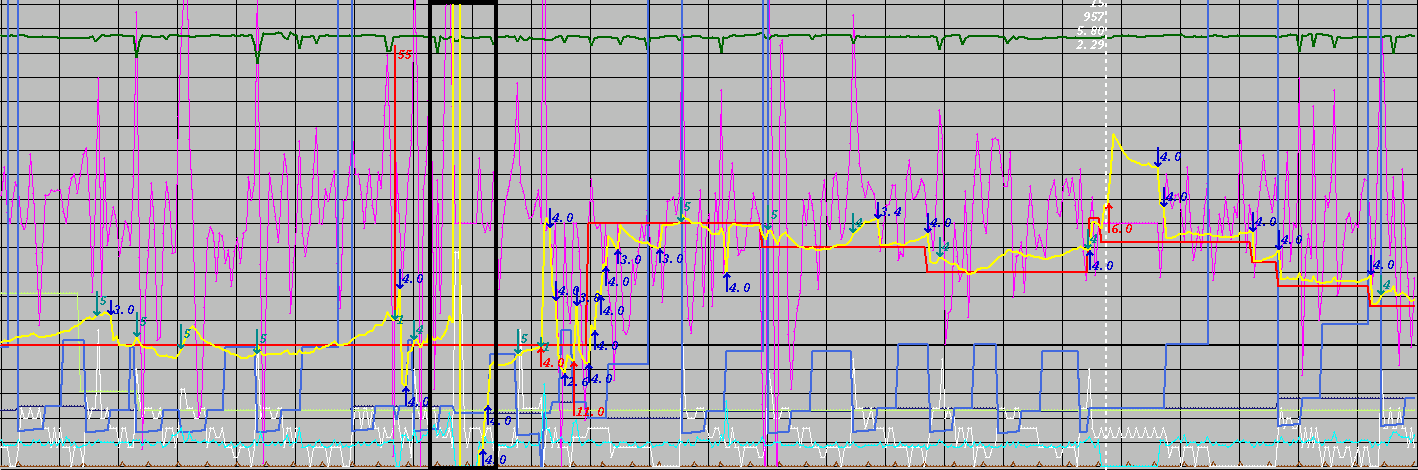

2.bmp
(470, 1417, 3)
[[1302, 1325]]


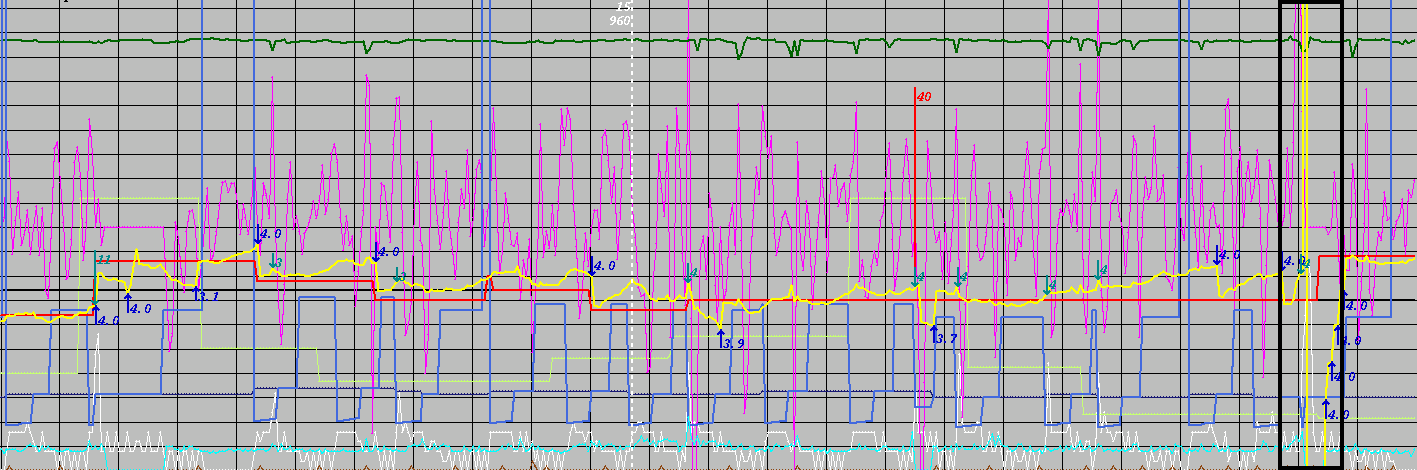

20.bmp
(467, 1416, 3)
[[122, 301], [301, 722], [721, 740]]


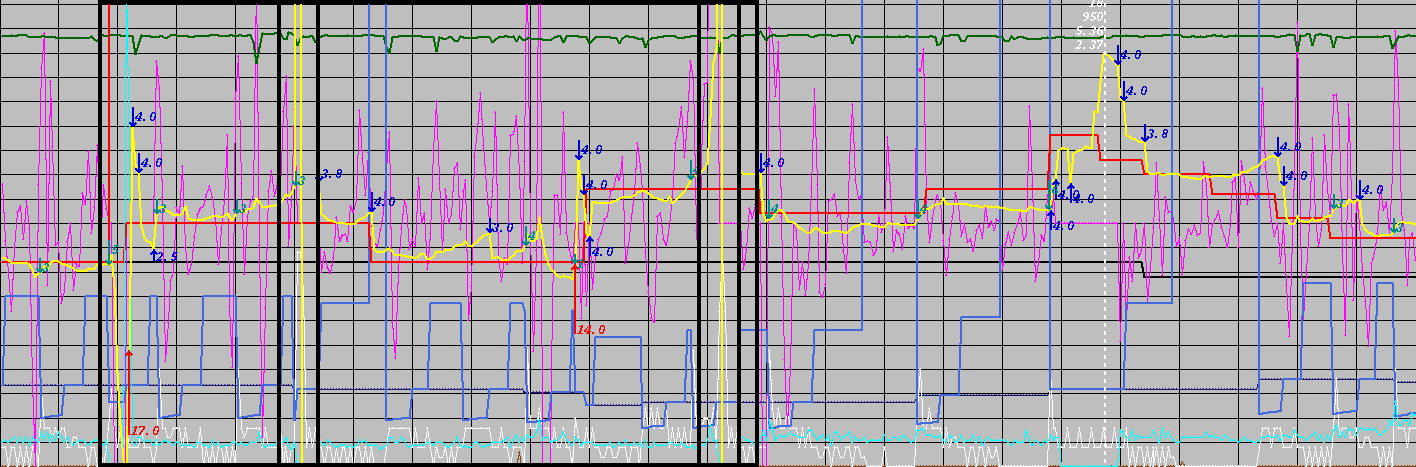

21.bmp
(468, 1418, 3)
[[559, 583]]


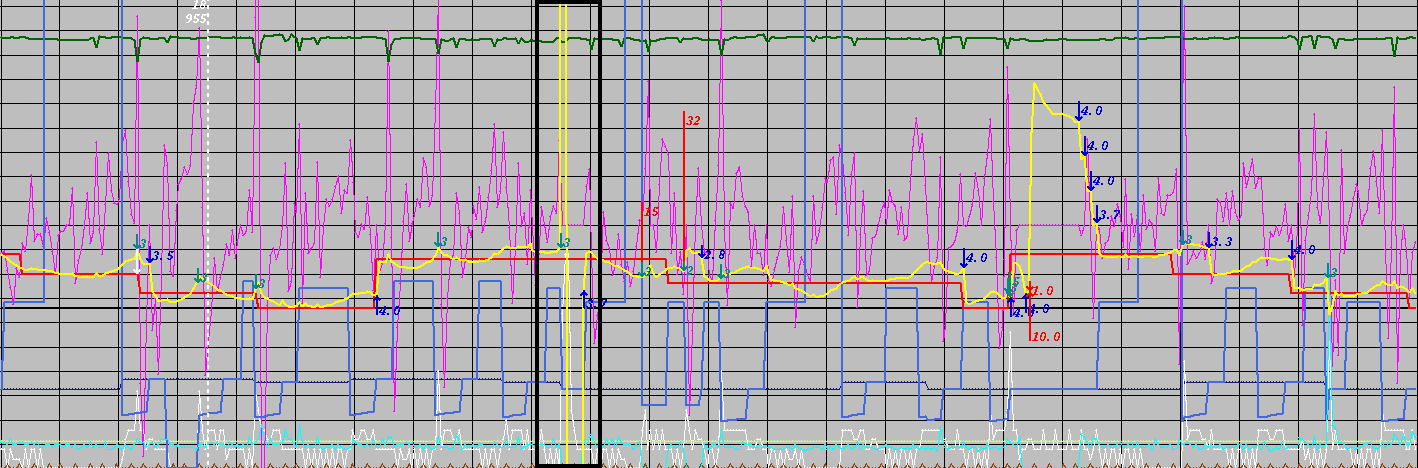

22.bmp
(472, 1418, 3)
[[1016, 1302], [1301, 1320]]


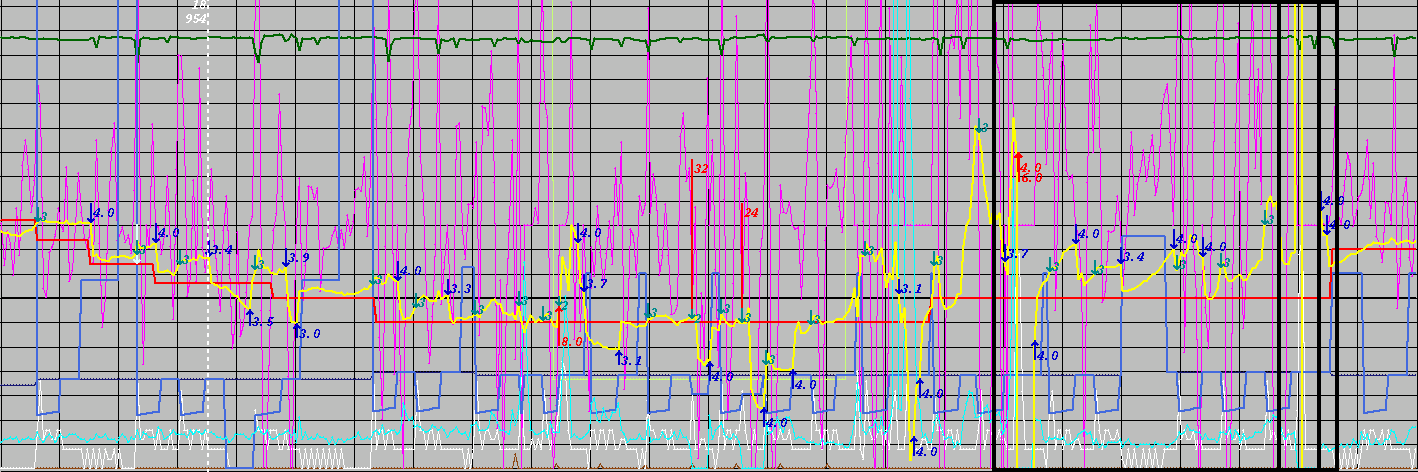

23.bmp
(466, 1418, 3)
[[384, 410]]


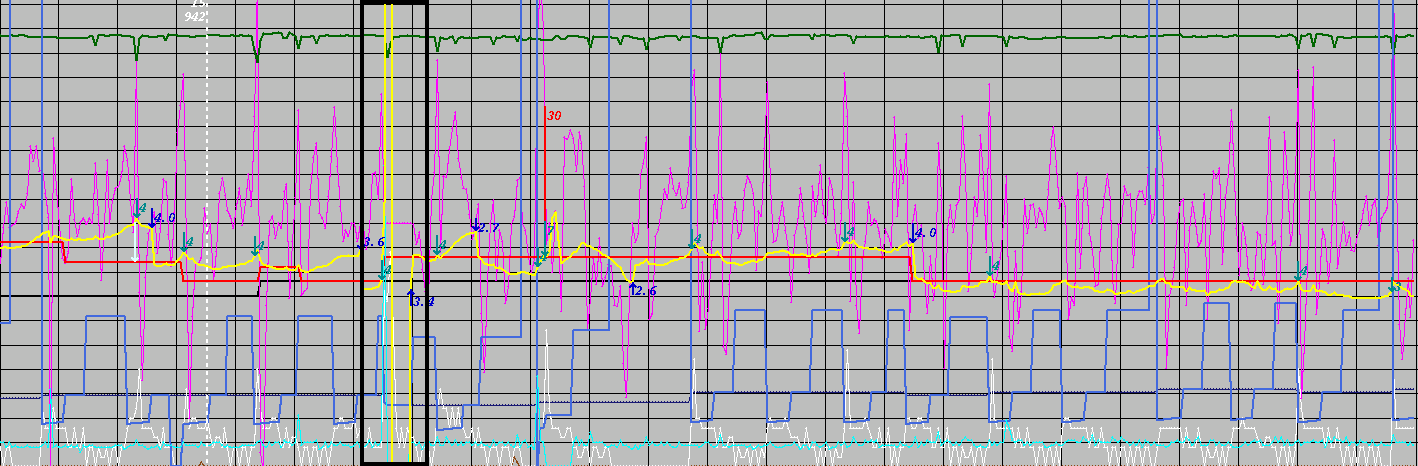

24.bmp
(469, 1417, 3)
[[1002, 1026]]


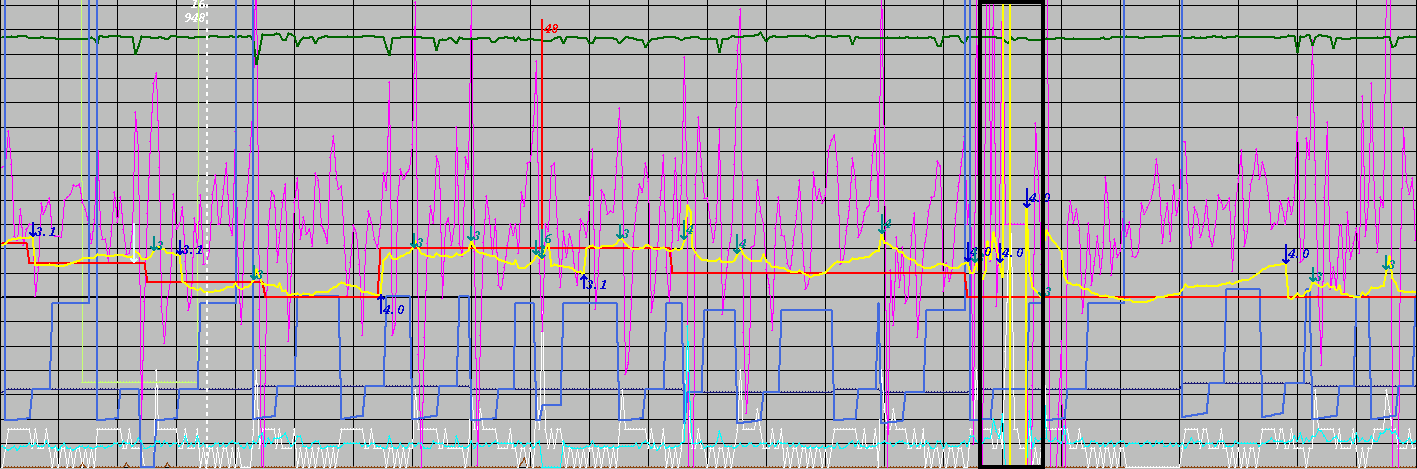

25.bmp
(468, 1418, 3)
[[616, 640]]


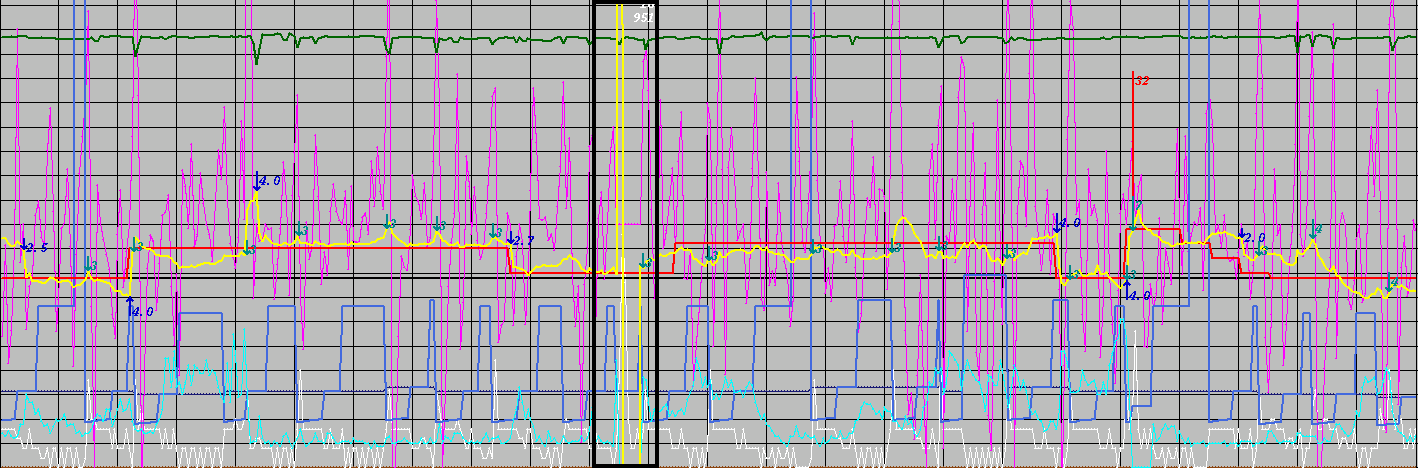

26.bmp
(471, 1418, 3)
[[163, 186]]


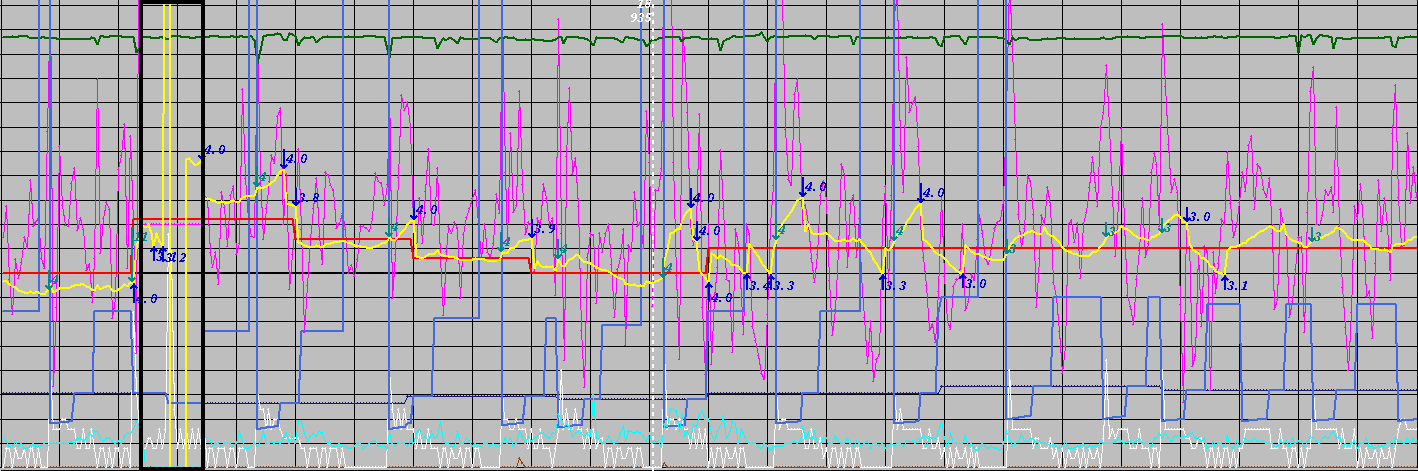

27.bmp
(467, 1419, 3)
[[93, 117]]


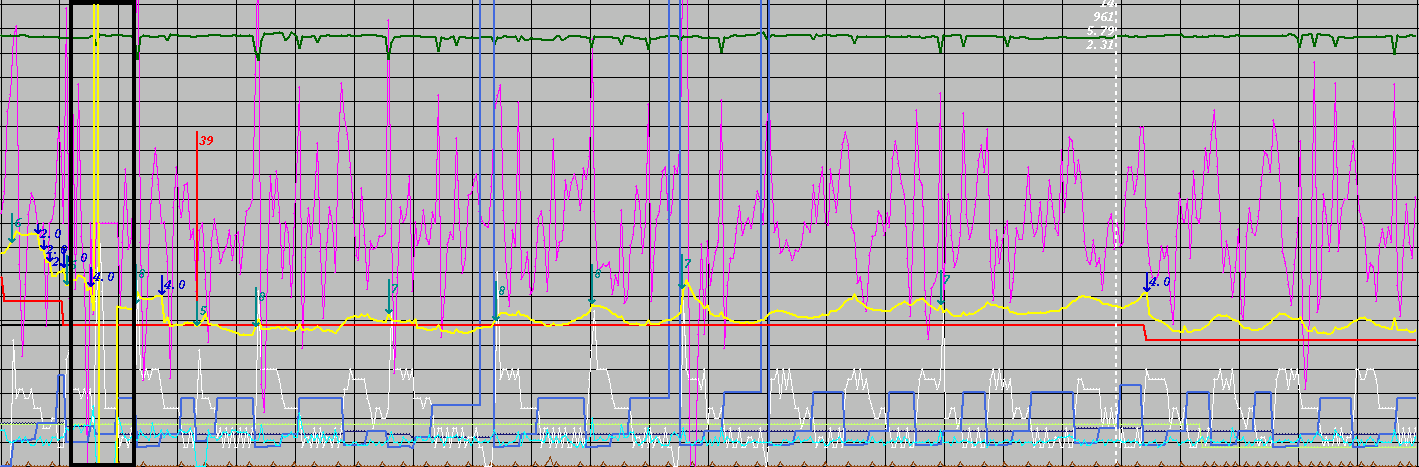

28.bmp
(468, 1418, 3)
[[809, 833]]


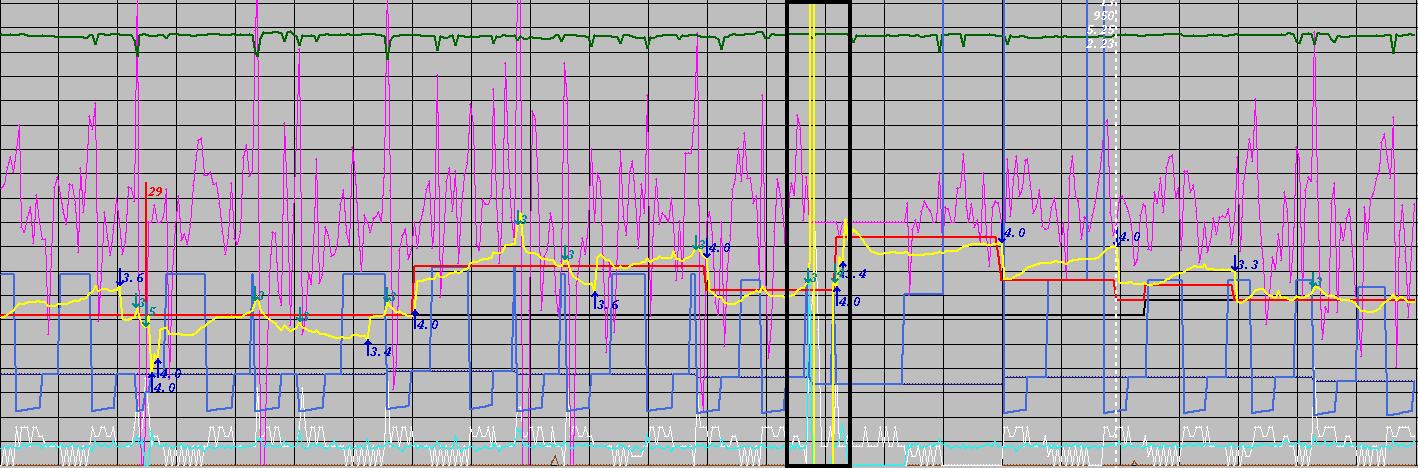

29.bmp
(469, 1417, 3)
1
1
[[281, 305], [434, 458], [514, 547], [521, 527]]
1


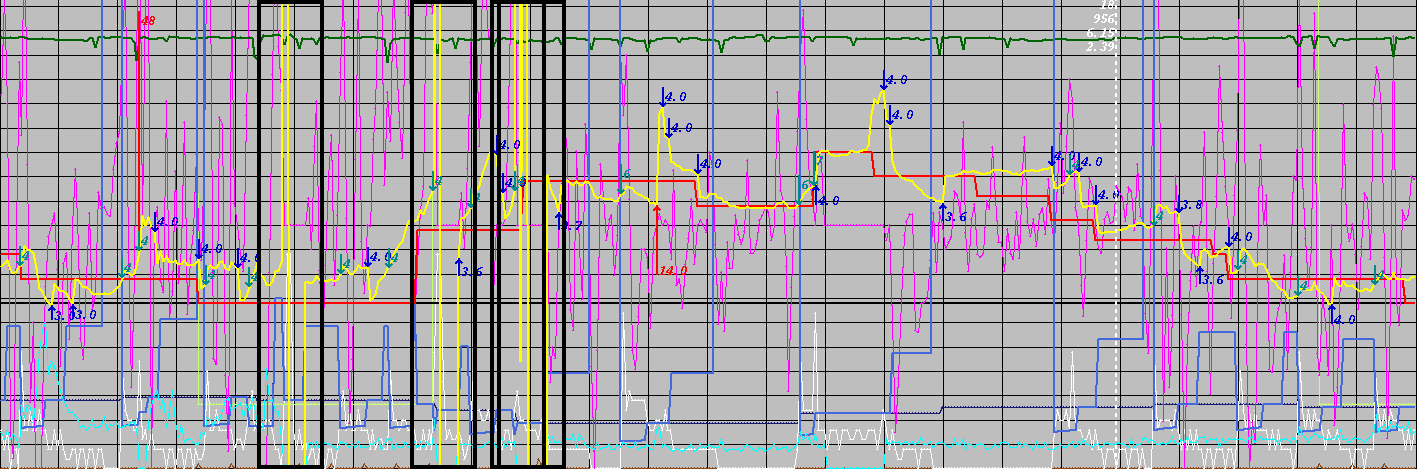

3.bmp
(473, 1415, 3)
[[1347, 1370]]


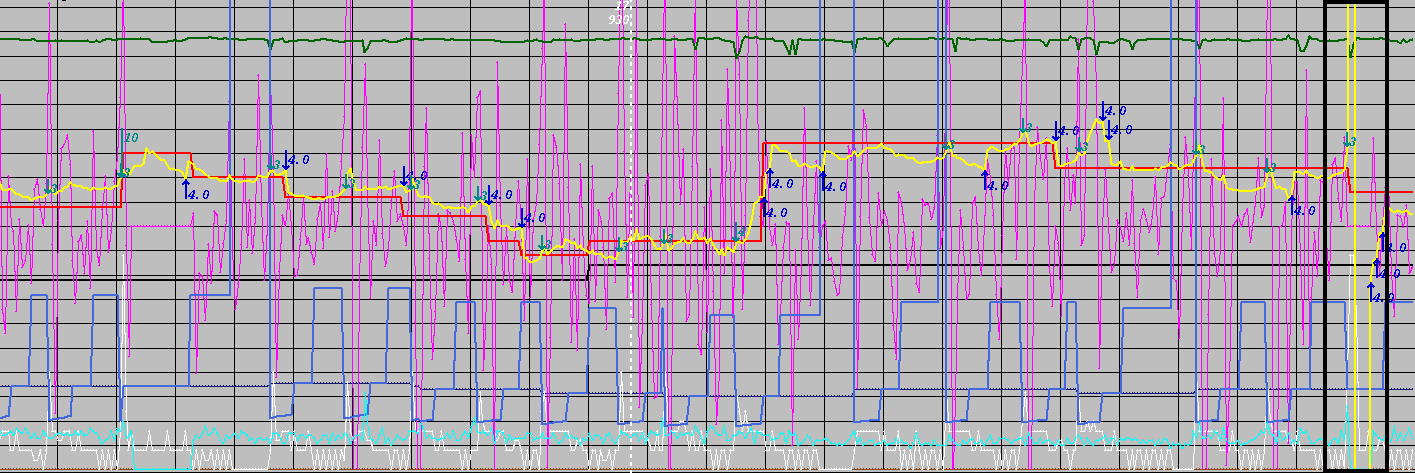

30.bmp
(471, 1417, 3)
[[1328, 1352]]


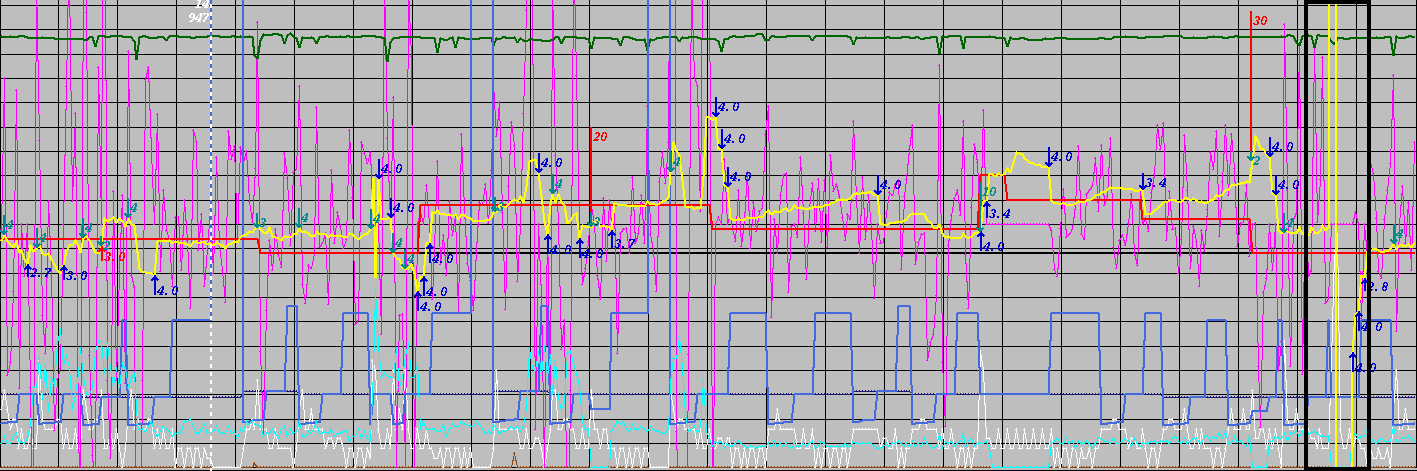

31.bmp
(468, 1417, 3)
[[491, 515]]


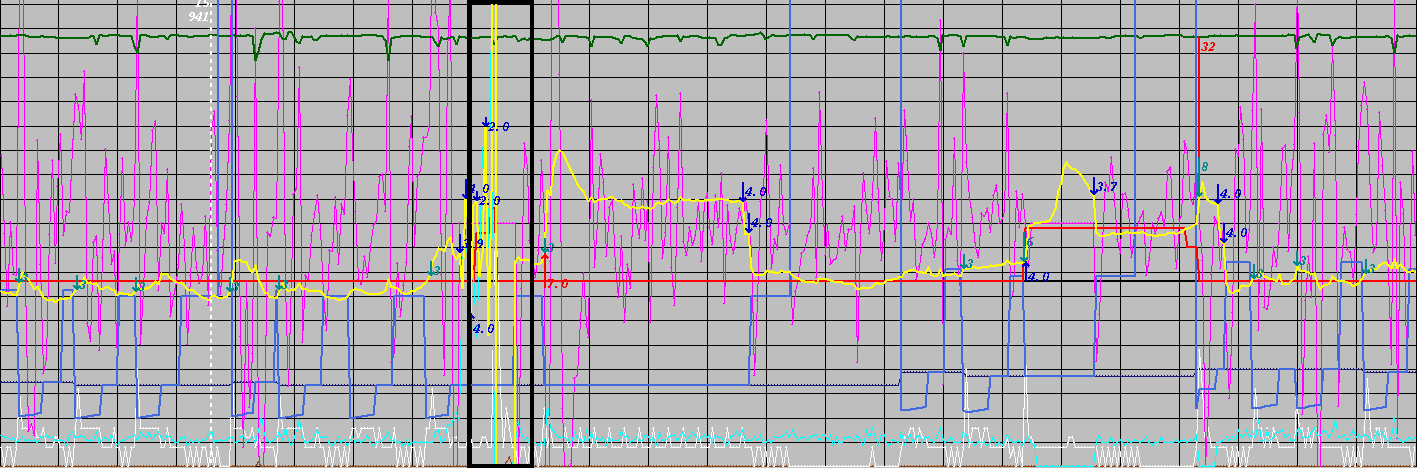

32.bmp
(468, 1416, 3)
[[848, 871]]


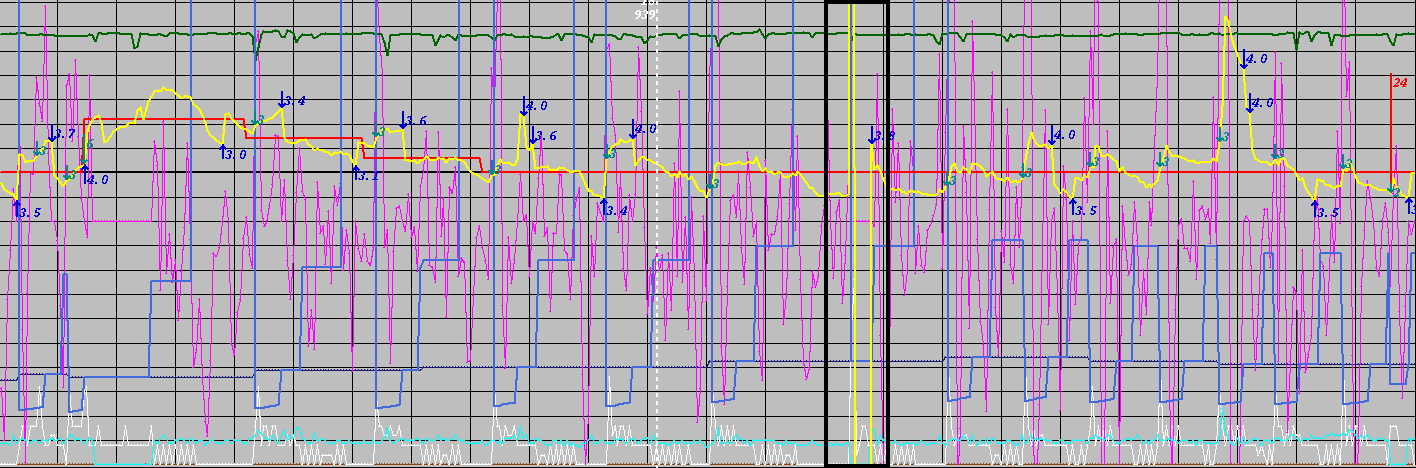

33.bmp
(468, 1417, 3)
[[586, 613], [934, 961]]


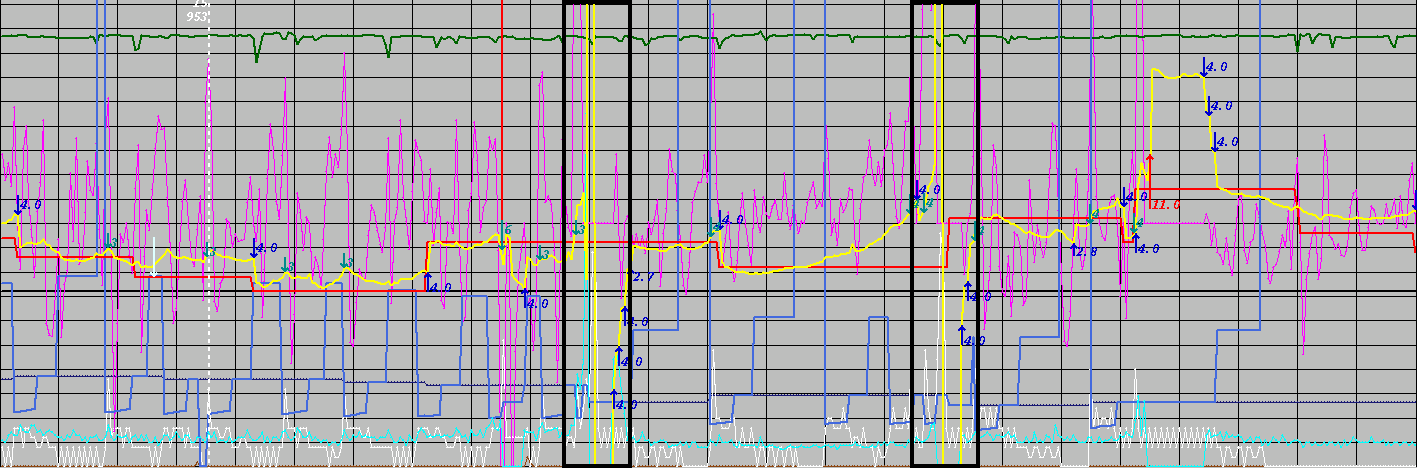

35.bmp
(472, 1417, 3)
[[313, 337], [444, 468], [644, 668]]


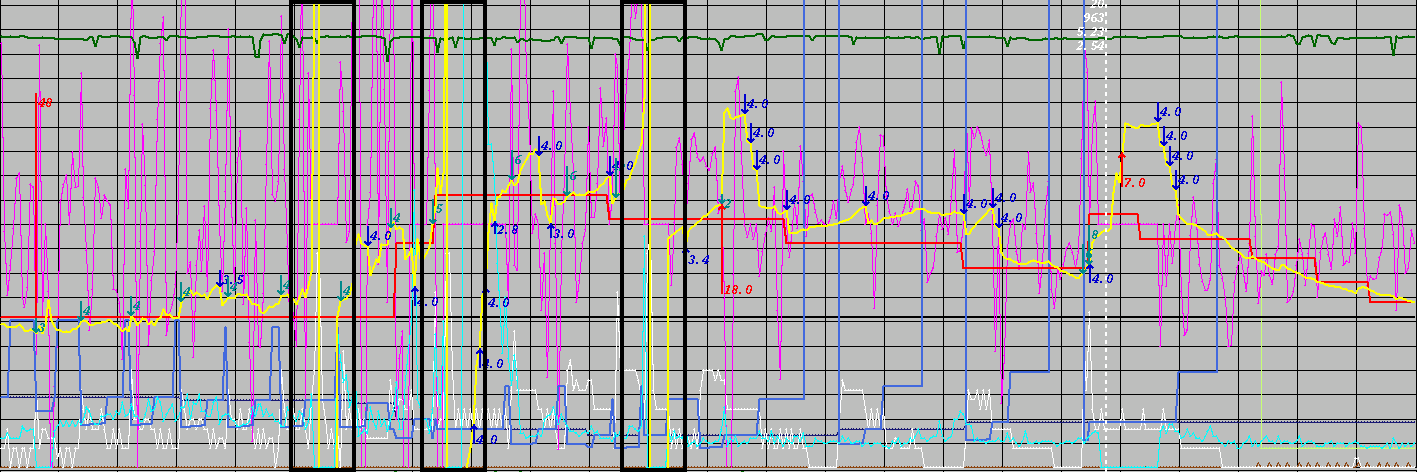

34.bmp
(470, 1417, 3)
[[1310, 1333]]


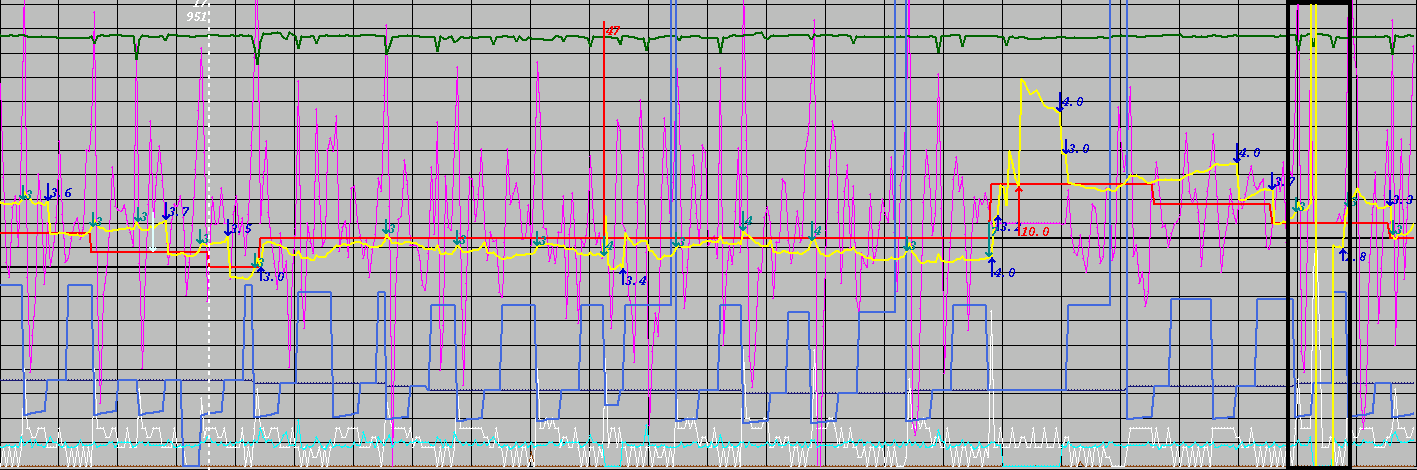

36.bmp
(471, 1418, 3)
[[253, 281], [282, 1397], [1154, 1414]]


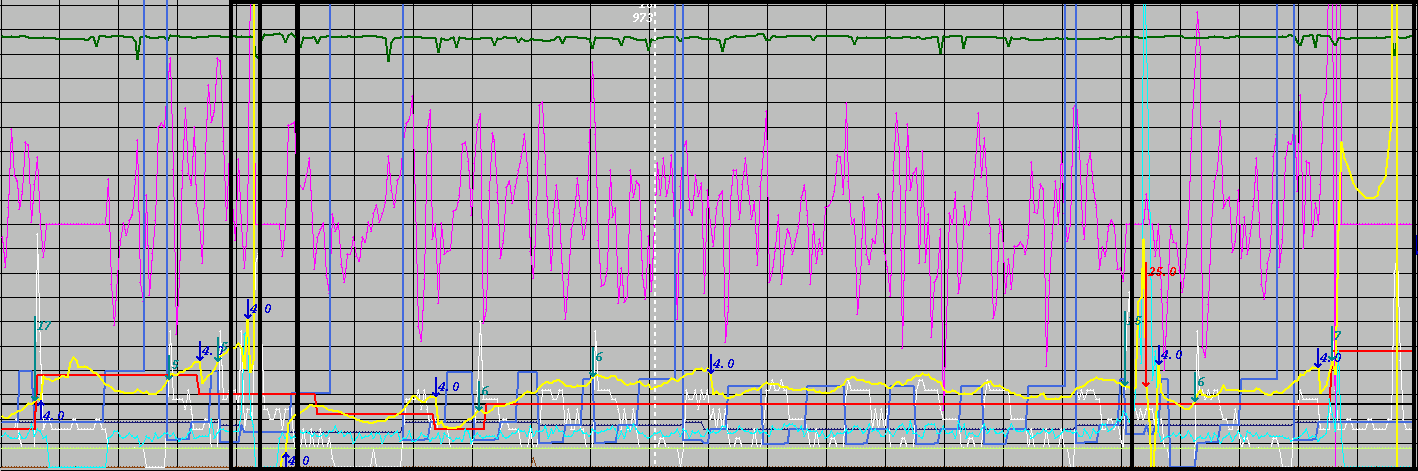

37.bmp
(468, 1420, 3)
[[7, 31]]


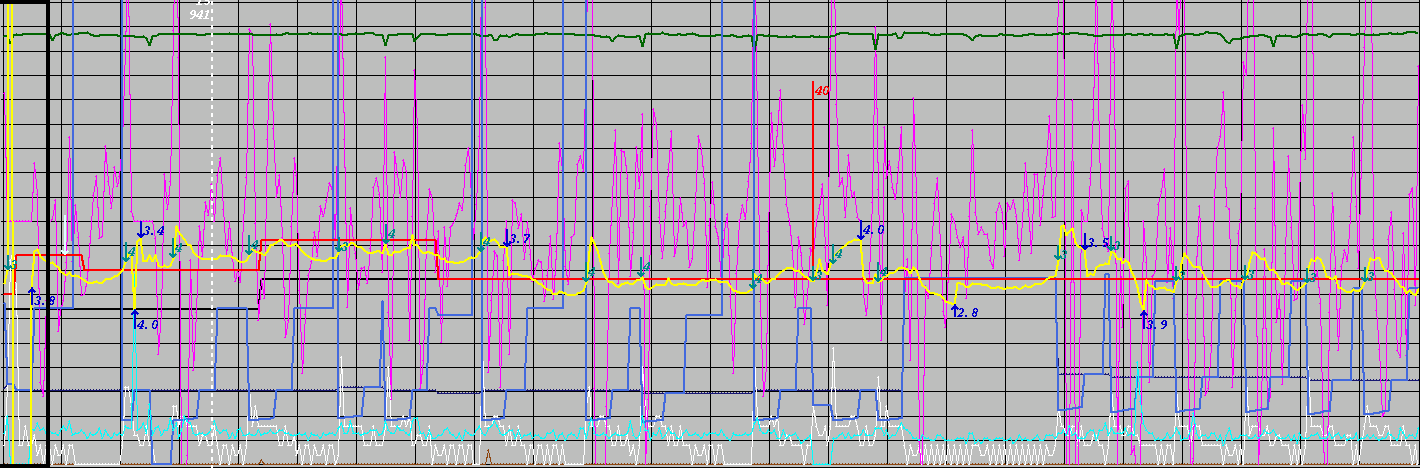

38.bmp
(471, 1417, 3)
[[1222, 1246]]


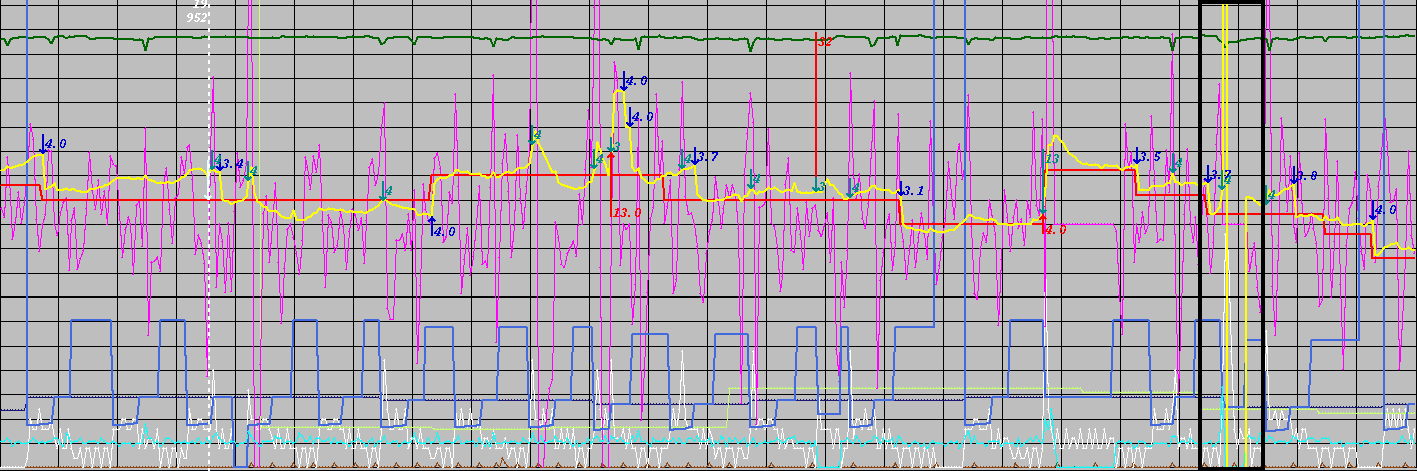

39.bmp
(472, 1421, 3)
[[494, 562]]


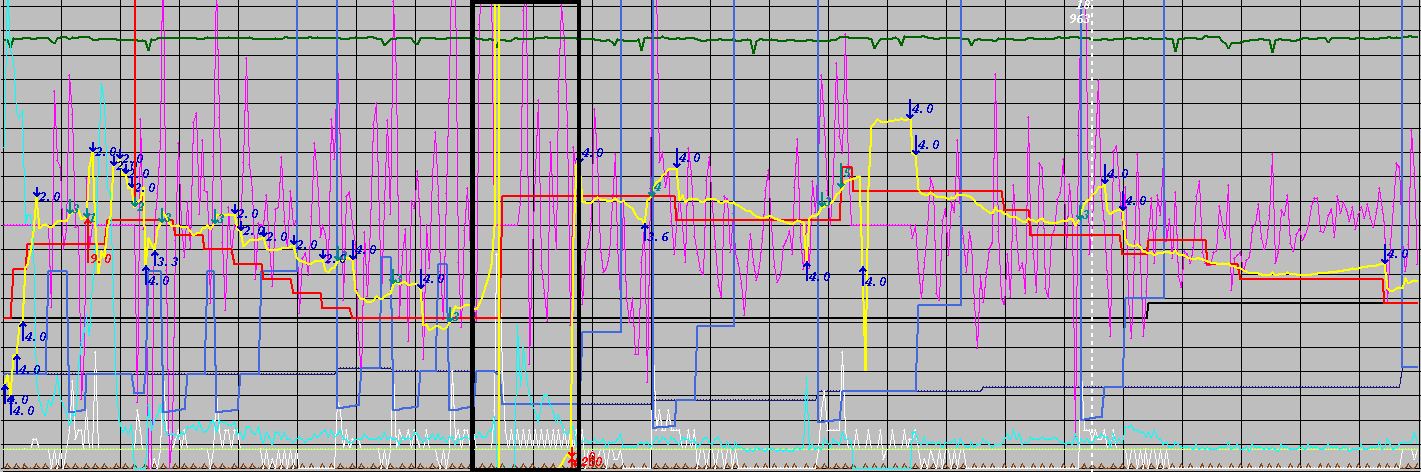

4.bmp
(470, 1419, 3)
[[364, 390]]


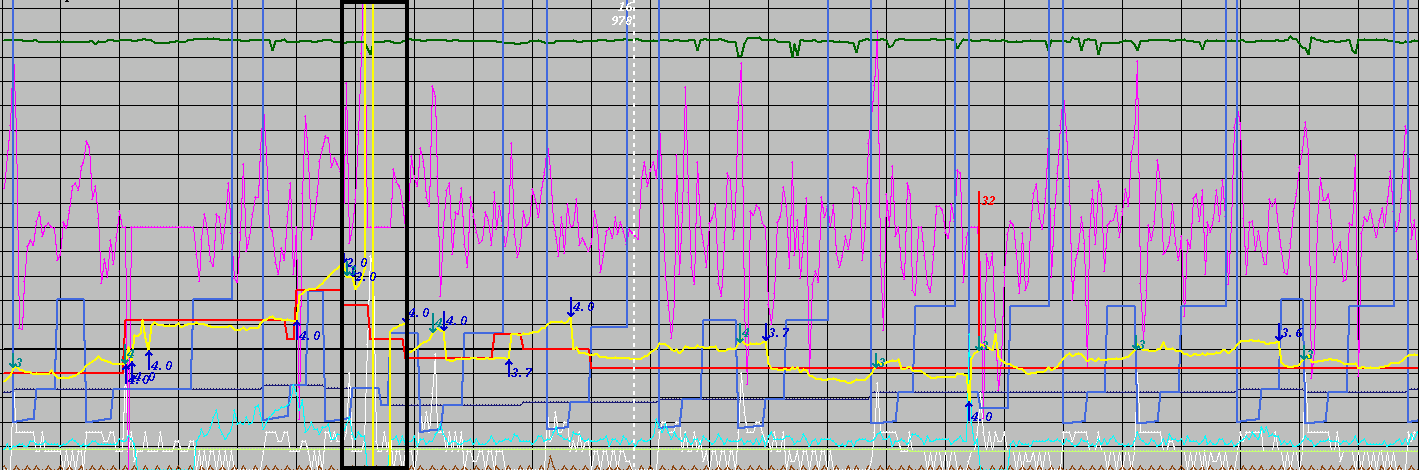

40.bmp
(469, 1417, 3)
[[635, 659]]


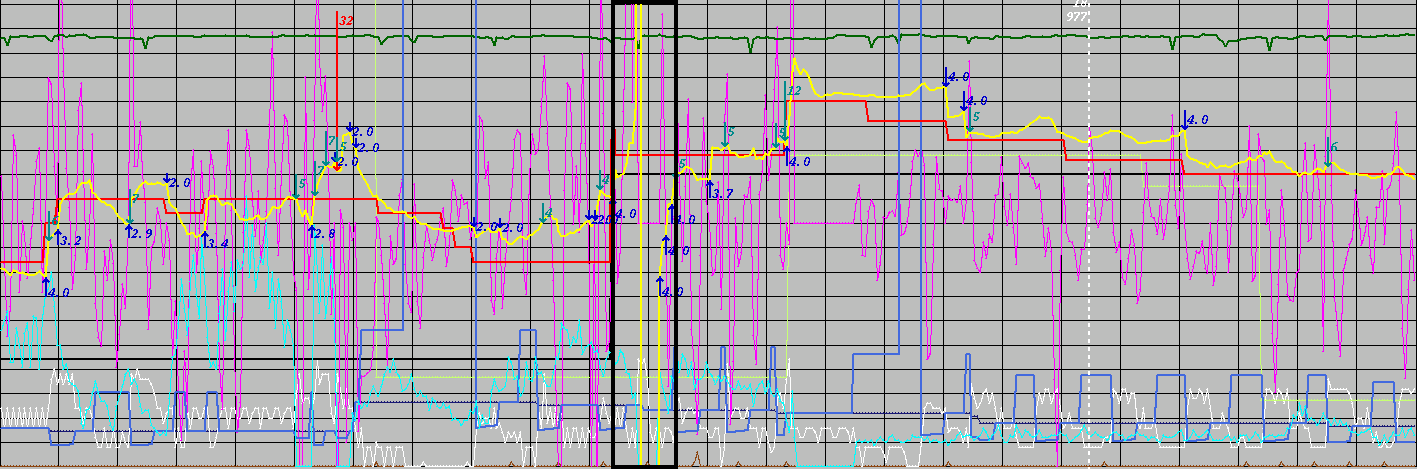

41.bmp
(469, 1419, 3)
[[30, 52]]


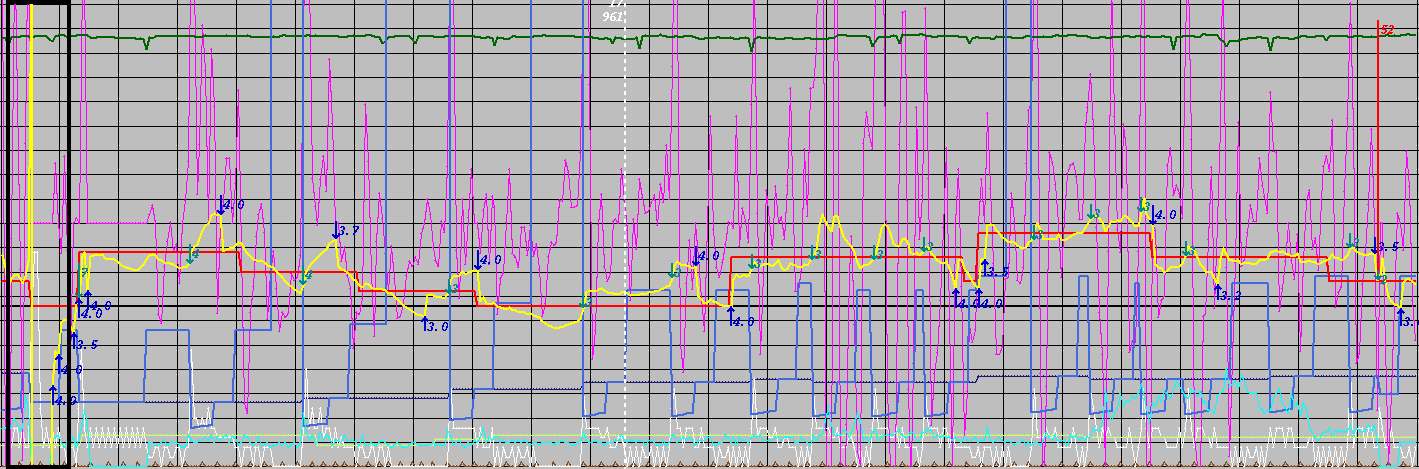

42.bmp
(470, 1418, 3)
[[1325, 1348]]


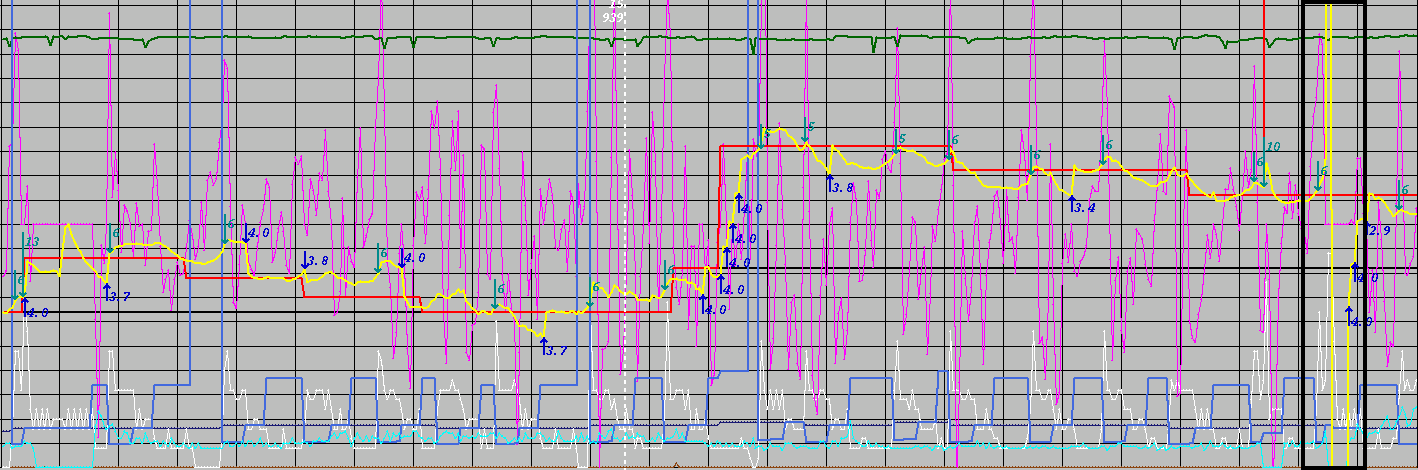

43.bmp
(470, 1416, 3)
[[1264, 1291], [1305, 1308]]


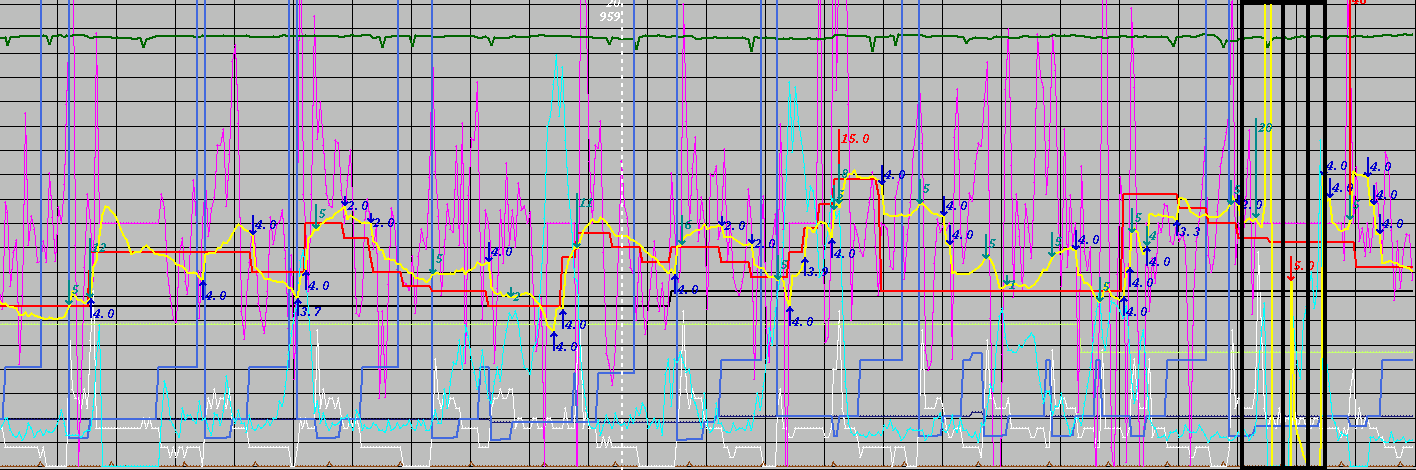

44.bmp
(472, 1419, 3)
[[747, 774]]


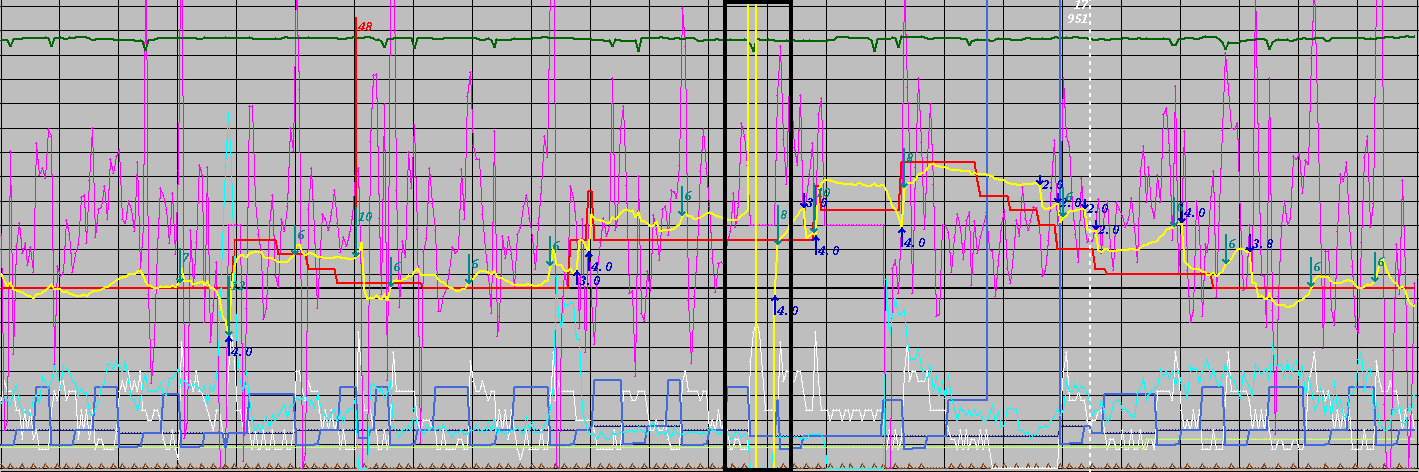

45.bmp
(471, 1416, 3)
1
1
[[406, 433], [990, 1003]]
1


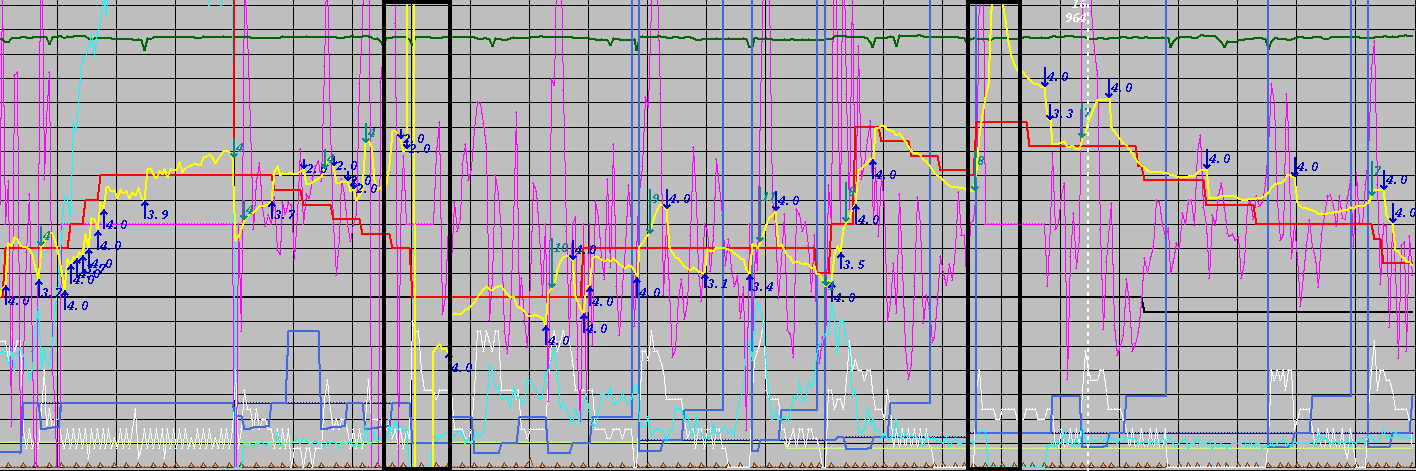

46.bmp
(470, 1415, 3)
[[61, 85], [141, 164]]


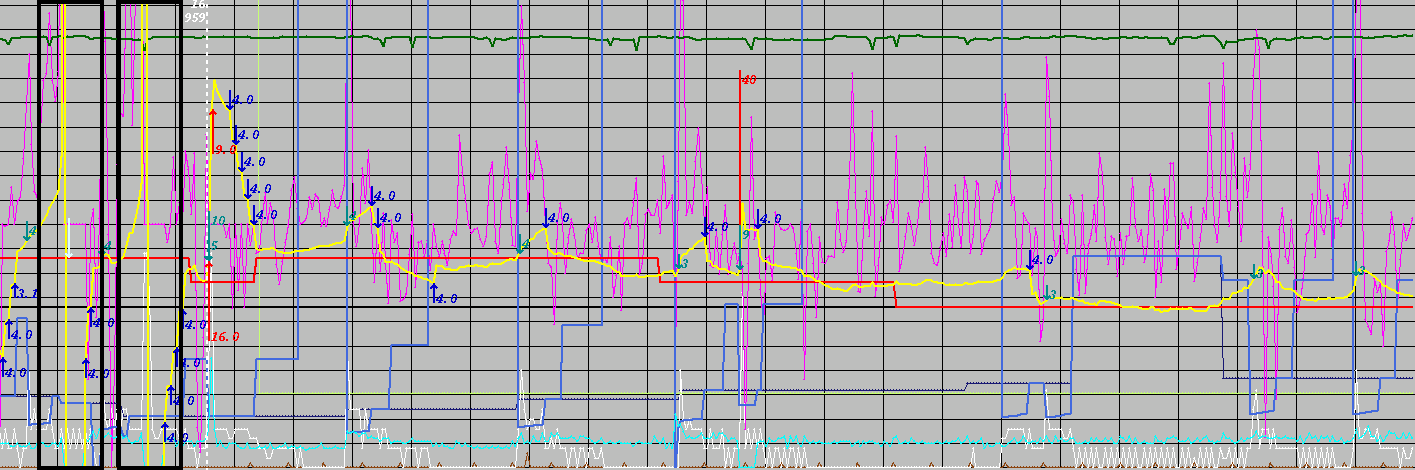

47.bmp
(471, 1418, 3)
[[1017, 1041]]


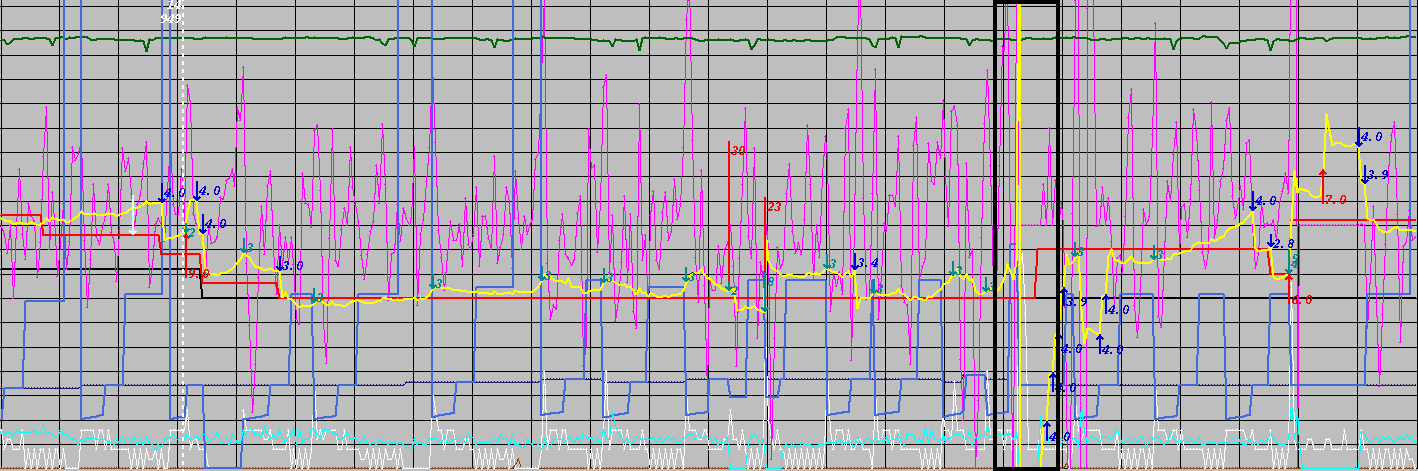

48.bmp
(469, 1417, 3)
[[44, 67], [135, 159], [168, 191]]


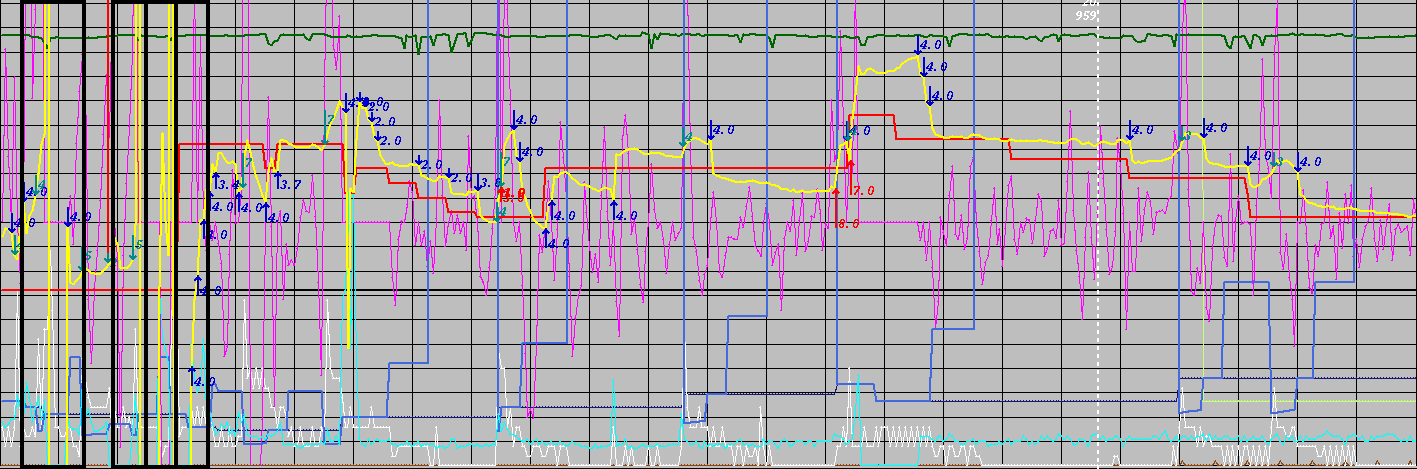

49.bmp
(469, 1418, 3)
[[647, 670]]


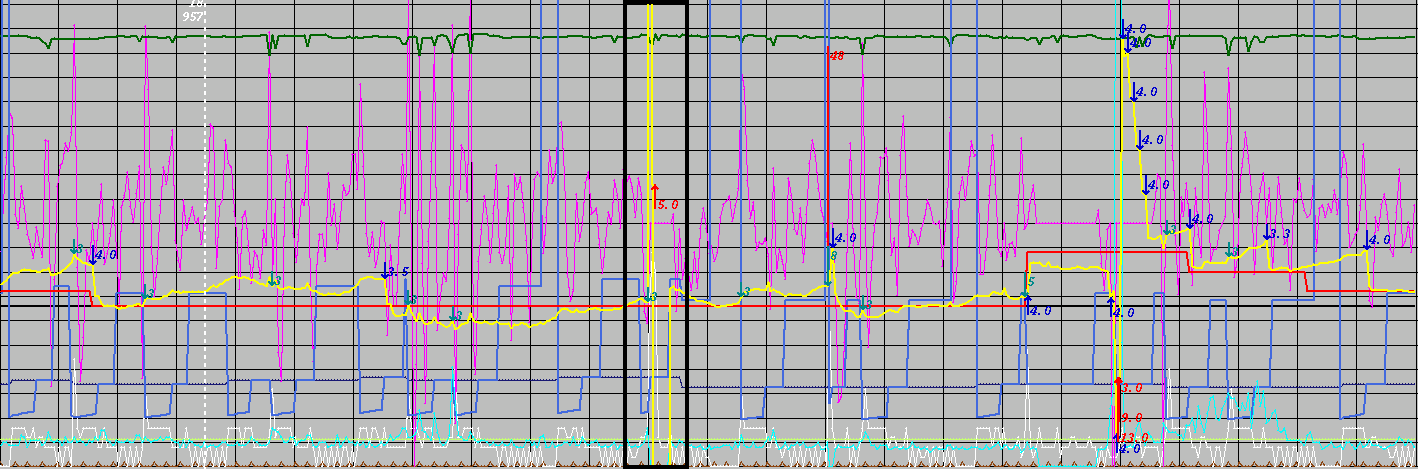

5.bmp
(468, 1419, 3)
[[692, 717]]


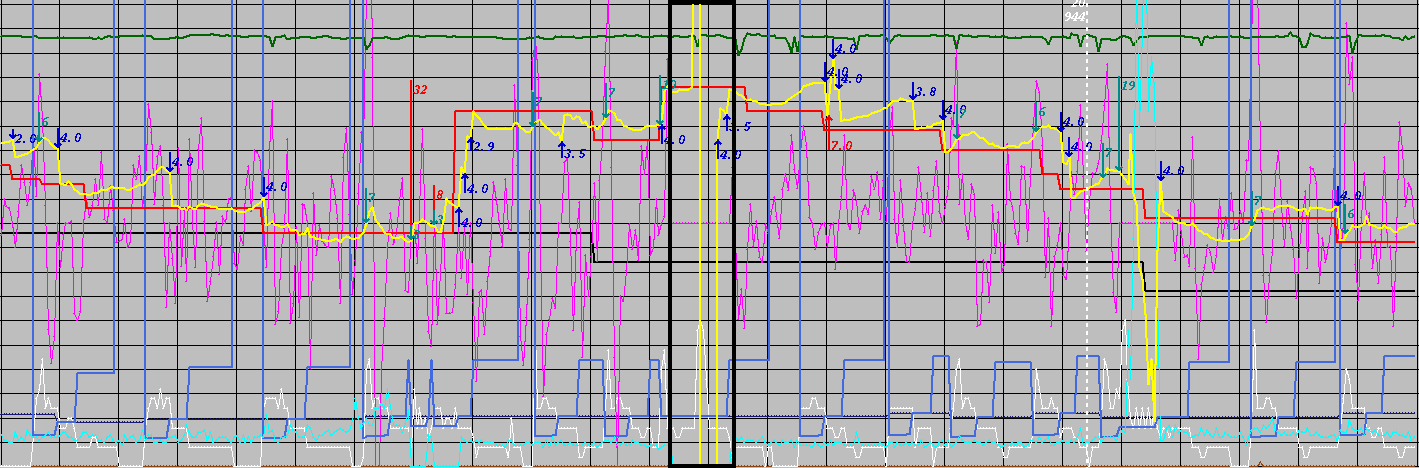

6.bmp
(468, 1418, 3)
[[951, 977]]


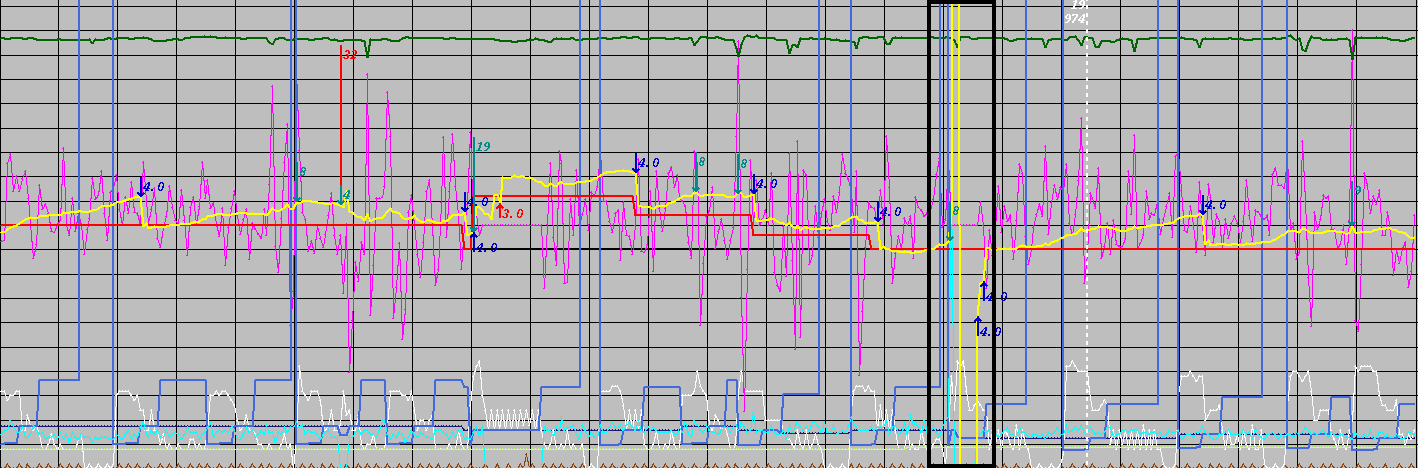

7.bmp
(468, 1417, 3)
[[1298, 1322]]


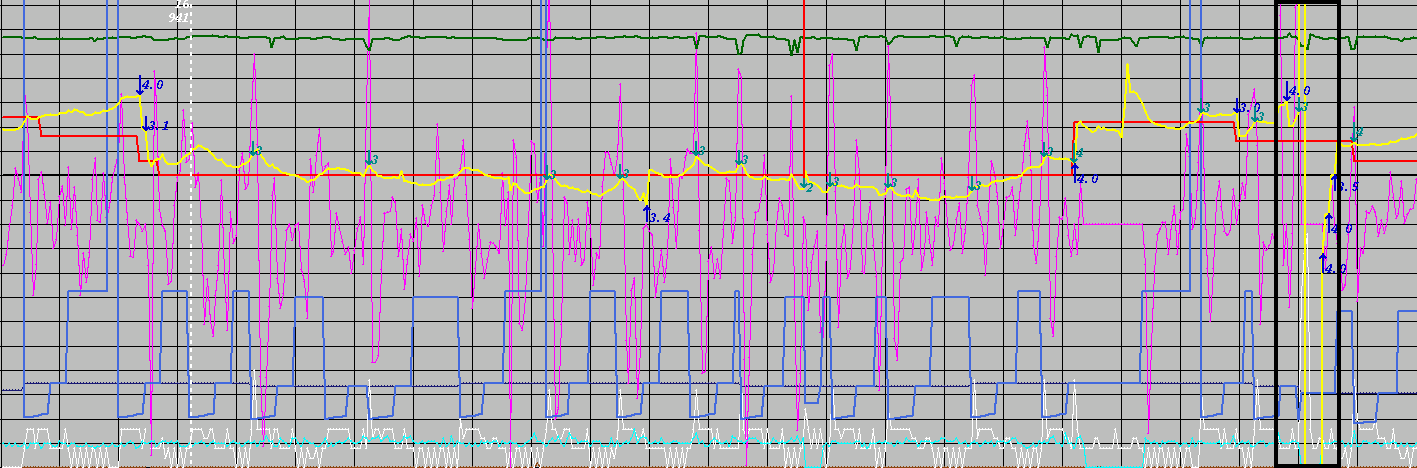

8.bmp
(467, 1416, 3)
[[266, 289]]


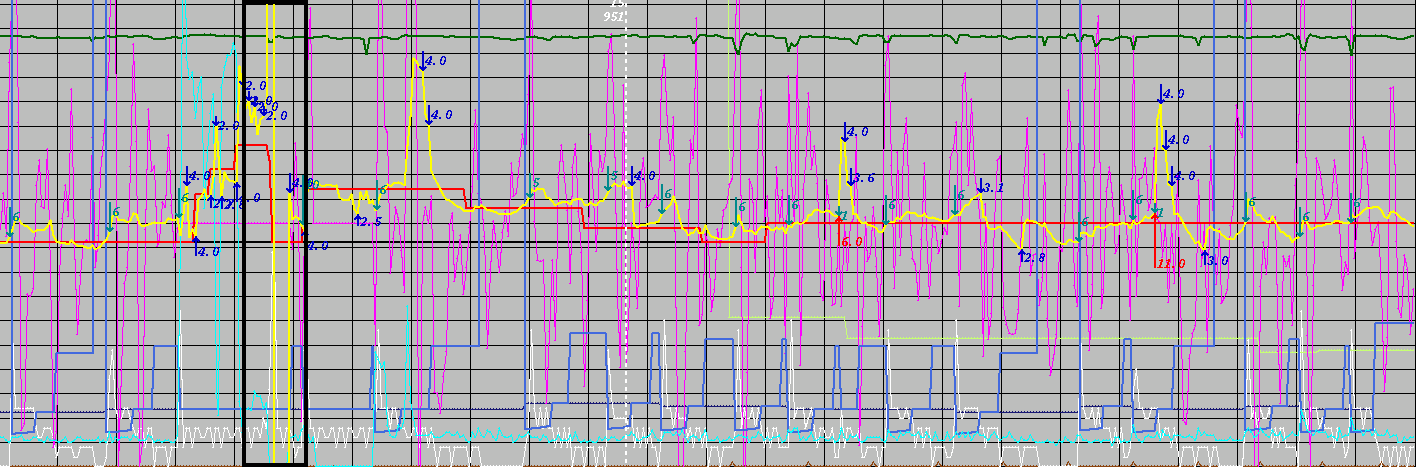

9.bmp
(470, 1418, 3)
[[1040, 1069]]


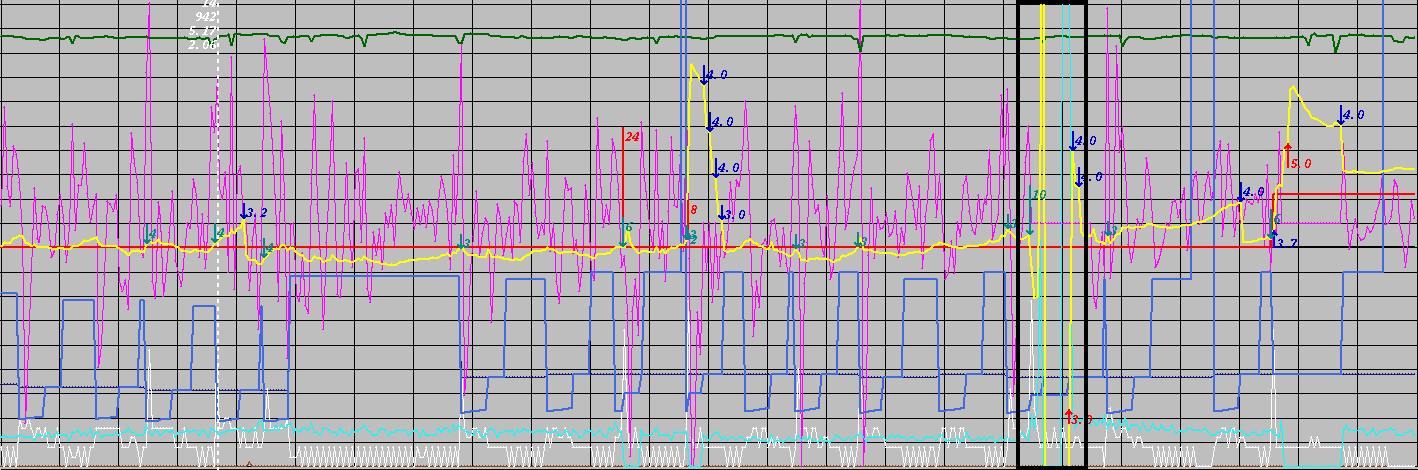

1.bmp
(465, 1417, 3)
[[1306, 1330]]


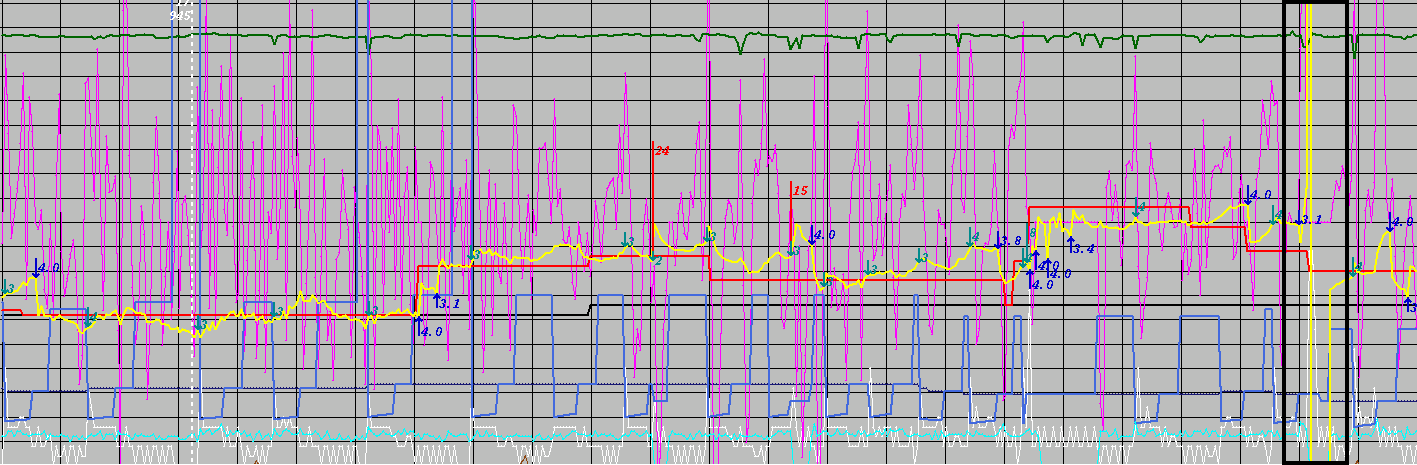

In [ ]:
for i in list_:
  print(i)
  paint_borders_2(i)